# **Objective**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
import datetime

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
matplotlib.rcParams['figure.figsize'] = (25, 15)
matplotlib.rcParams['font.size'] = 10
random.seed(0)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Data

In [4]:
property_df = pd.read_csv(r"C:/Users/payoj.jain/Documents/projects/properties_with_coastal_elevation.csv")

In [5]:
len(property_df.values)

22624

Data available is from 24 different European countries. There are over 22000 properties across Europe. 

In [6]:
splits = property_df['ACCOMMODATION_CODE'].str.split("-")
property_df['COUNTRY'] = pd.DataFrame(data=list(splits)[0:])[0]

In [7]:
country_count = pd.DataFrame(data=[], columns={"# Properties"})
country_count["# Properties"] = property_df.groupby(["COUNTRY"]).count().sort_values("COUNTRY")["ACCOMMODATION_CODE"]

In [8]:
countries_list_to_analyse = ["AT", "BE", "DE", "ES", "FR", "HR", "IT"]

In [9]:
country_count = country_count.reset_index()
country_count.transpose()

0     1   2    3   4    5     6   7     8     9   10   11  \
COUNTRY         AT    BE  BQ   CH  CW   CZ    DE  DK    ES    FR   GB   GR   
# Properties  2351  1727  20  215  59  392  2874   2  1825  3433  286  297   

                12  13  14    15  16    17   18   19  20  21  22  23  
COUNTRY         HR  HU  IE    IT  LU    NL   PL   PT  SE  SI  SK  TR  
# Properties  2367  18  37  3832   8  2284  145  337  11  80   7  17

##### __Italy and France have most number of properties (over 3400 each).__

#### Fields available

In [10]:
#property_df = property_df.drop(property_df.columns[[0,1]], axis=1)

In [11]:
print([i for i in property_df.columns])

['ID', 'ACCOMMODATION_CODE', 'X', 'ACCOMMODATION_TYPE', 'ACCO_DESCRIPTION', 'PROVIDER_NAME', 'NUMBER_OF_PERSONS', 'BEDROOM_COUNT', 'BATHROOM_COUNT', 'HAS_WIFI', 'HAS_POOL', 'HAS_PRIVATE_POOL', 'HAS_SHARED_POOL', 'HAS_INDOOR_POOL', 'HAS_OUTDOOR_POOL', 'IS_DETACHED', 'HAS_SAUNA', 'HAS_JACUZZI', 'IS_SKIING', 'IS_ON_A_FARM', 'X2017.x', 'X2018.x', 'X2019.x', 'X2017.y', 'X2018.y', 'X2019.y', 'total2019', 'total2018', 'total2017', 'Total_HO', 'Total_BV', 'LATITUDE', 'LONGITUDE', 'max', 'ELEVATION', 'if_near_coast', 'distance_from_coast', 'nearest_coastal_longitude', 'nearest_coastal_latitude', 'COUNTRY']


In [12]:
len(property_df.columns)

40

In [13]:
property_df = property_df.drop(['ID','X','PROVIDER_NAME'], axis=1)

In [14]:
property_df.head()

ACCOMMODATION_CODE  ACCOMMODATION_TYPE ACCO_DESCRIPTION  NUMBER_OF_PERSONS  \
0         AT-1050-01                   1        Apartment                  4   
1         AT-1115-01                   3           Chalet                 10   
2         AT-1160-01                   1        Apartment                  2   
3         AT-1160-02                   1        Apartment                  2   
4         AT-1160-03                   1        Apartment                  4   

   BEDROOM_COUNT  BATHROOM_COUNT  HAS_WIFI  HAS_POOL  HAS_PRIVATE_POOL  \
0              1               1         1         0                 0   
1              0               0         0         0                 0   
2              2               1         1         0                 0   
3              1               1         1         0                 0   
4              3               1         1         0                 0   

   HAS_SHARED_POOL  HAS_INDOOR_POOL  HAS_OUTDOOR_POOL  IS_DETACHED  HAS_SAUNA  \
0                0                0                 0            0          0   
1                0                0                 0            1          0   
2                0                0                 0            0          0   
3                0                0                 0            0          0   
4                0                0                 0            0          0   

   HAS_JACUZZI  IS_SKIING  IS_ON_A_FARM    X2017.x  X2018.x  X2019.x  \
0            0          0             0  1068.4800      0.0      0.0   
1            0          0             0  4474.4400      0.0      0.0   
2            0          0             0   358.3000      0.0      0.0   
3            0          0             0   518.9500      0.0      0.0   
4            0          0             0  2202.5825      0.0      0.0   

    X2017.y  X2018.y  X2019.y  total2019  total2018  total2017  Total_HO  \
0  2627.118  432.358      0.0        0.0    432.358  3695.5980  3059.476   
1     0.000    0.000      0.0        0.0      0.000  4474.4400     0.000   
2   329.472    0.000      0.0        0.0      0.000   687.7720   329.472   
3   123.266    0.000      0.0        0.0      0.000   642.2160   123.266   
4   430.144    0.000      0.0        0.0      0.000  2632.7265   430.144   

    Total_BV   LATITUDE  LONGITUDE        max  ELEVATION  if_near_coast  \
0  1068.4800  48.184128  16.367247  3695.5980      207.0              0   
1  4474.4400  47.038075  10.610737  4474.4400     1444.0              0   
2   358.3000  48.216322  16.312146   687.7720      232.0              0   
3   518.9500  48.216322  16.312146   642.2160      232.0              0   
4  2202.5825  48.216320  16.312150  2632.7265      232.0              0   

   distance_from_coast  nearest_coastal_longitude  nearest_coastal_latitude  \
0                  NaN                        NaN                       NaN   
1                  NaN                        NaN                       NaN   
2                  NaN                        NaN                       NaN   
3                  NaN                        NaN                       NaN   
4                  NaN                        NaN                       NaN   

  COUNTRY  
0      AT  
1      AT  
2      AT  
3      AT  
4      AT

__Analysis__

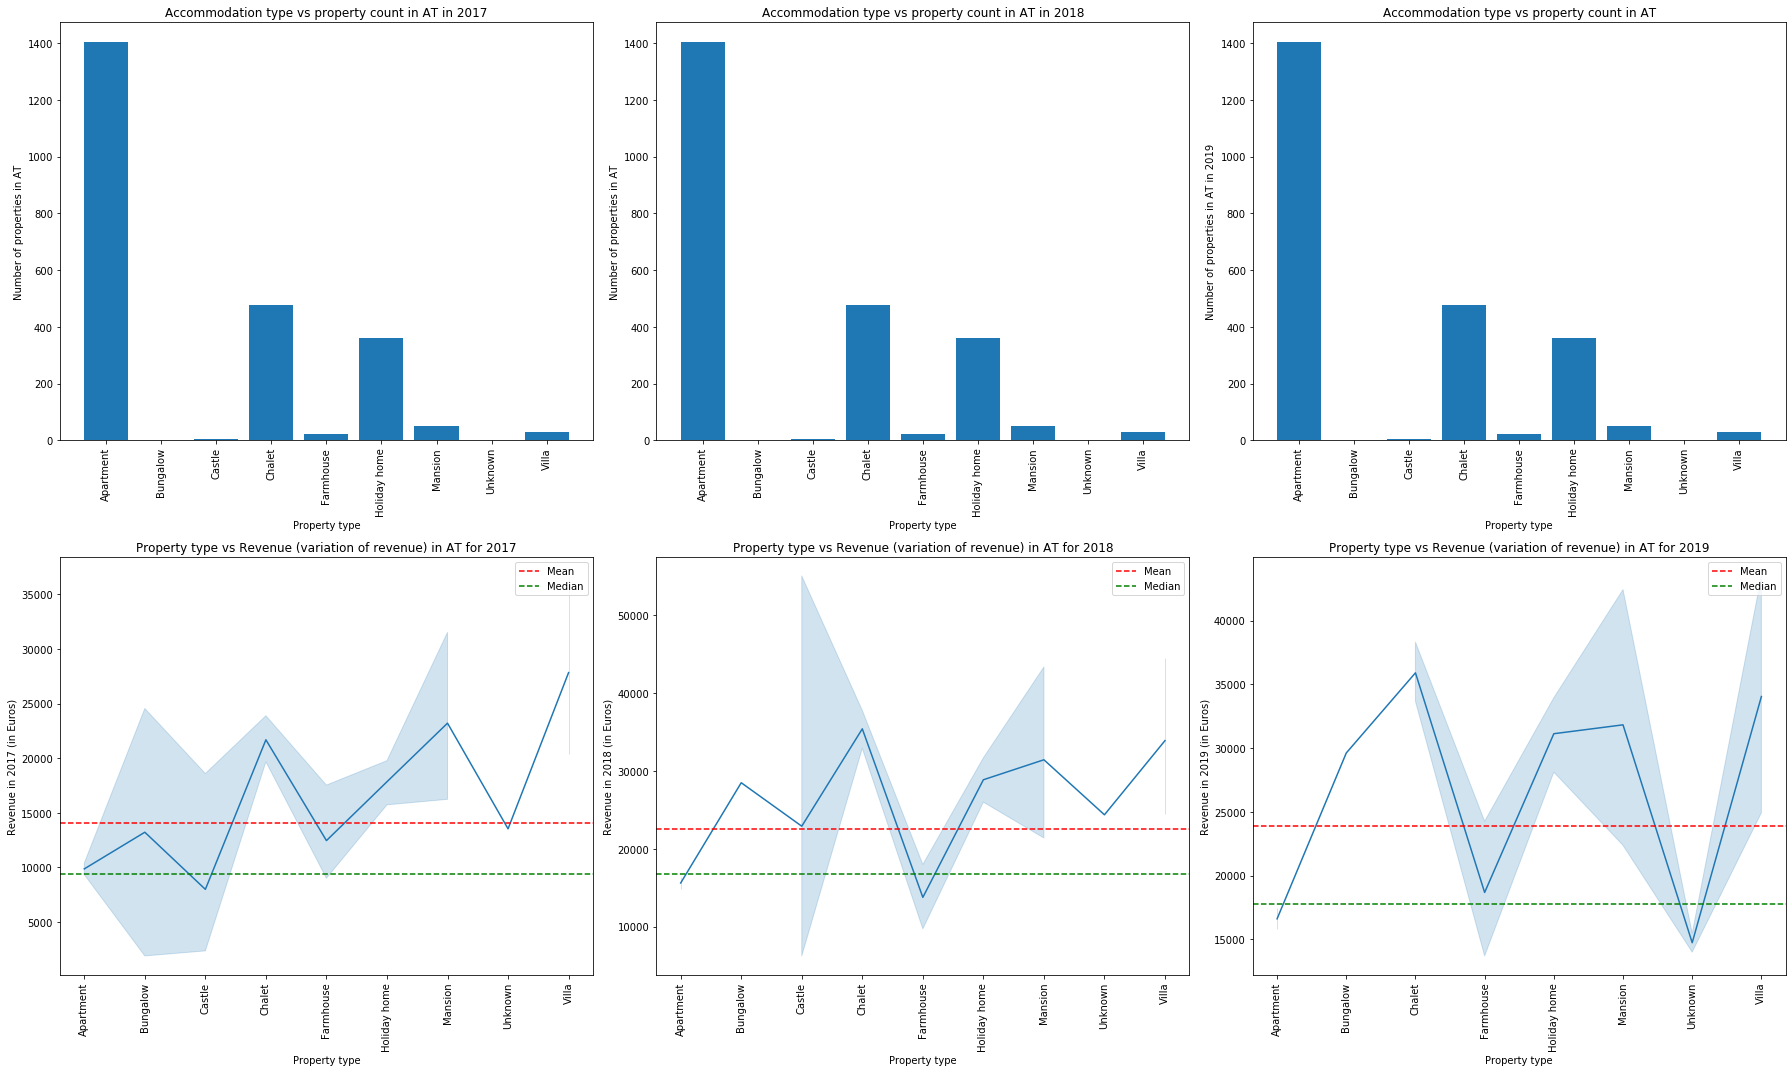

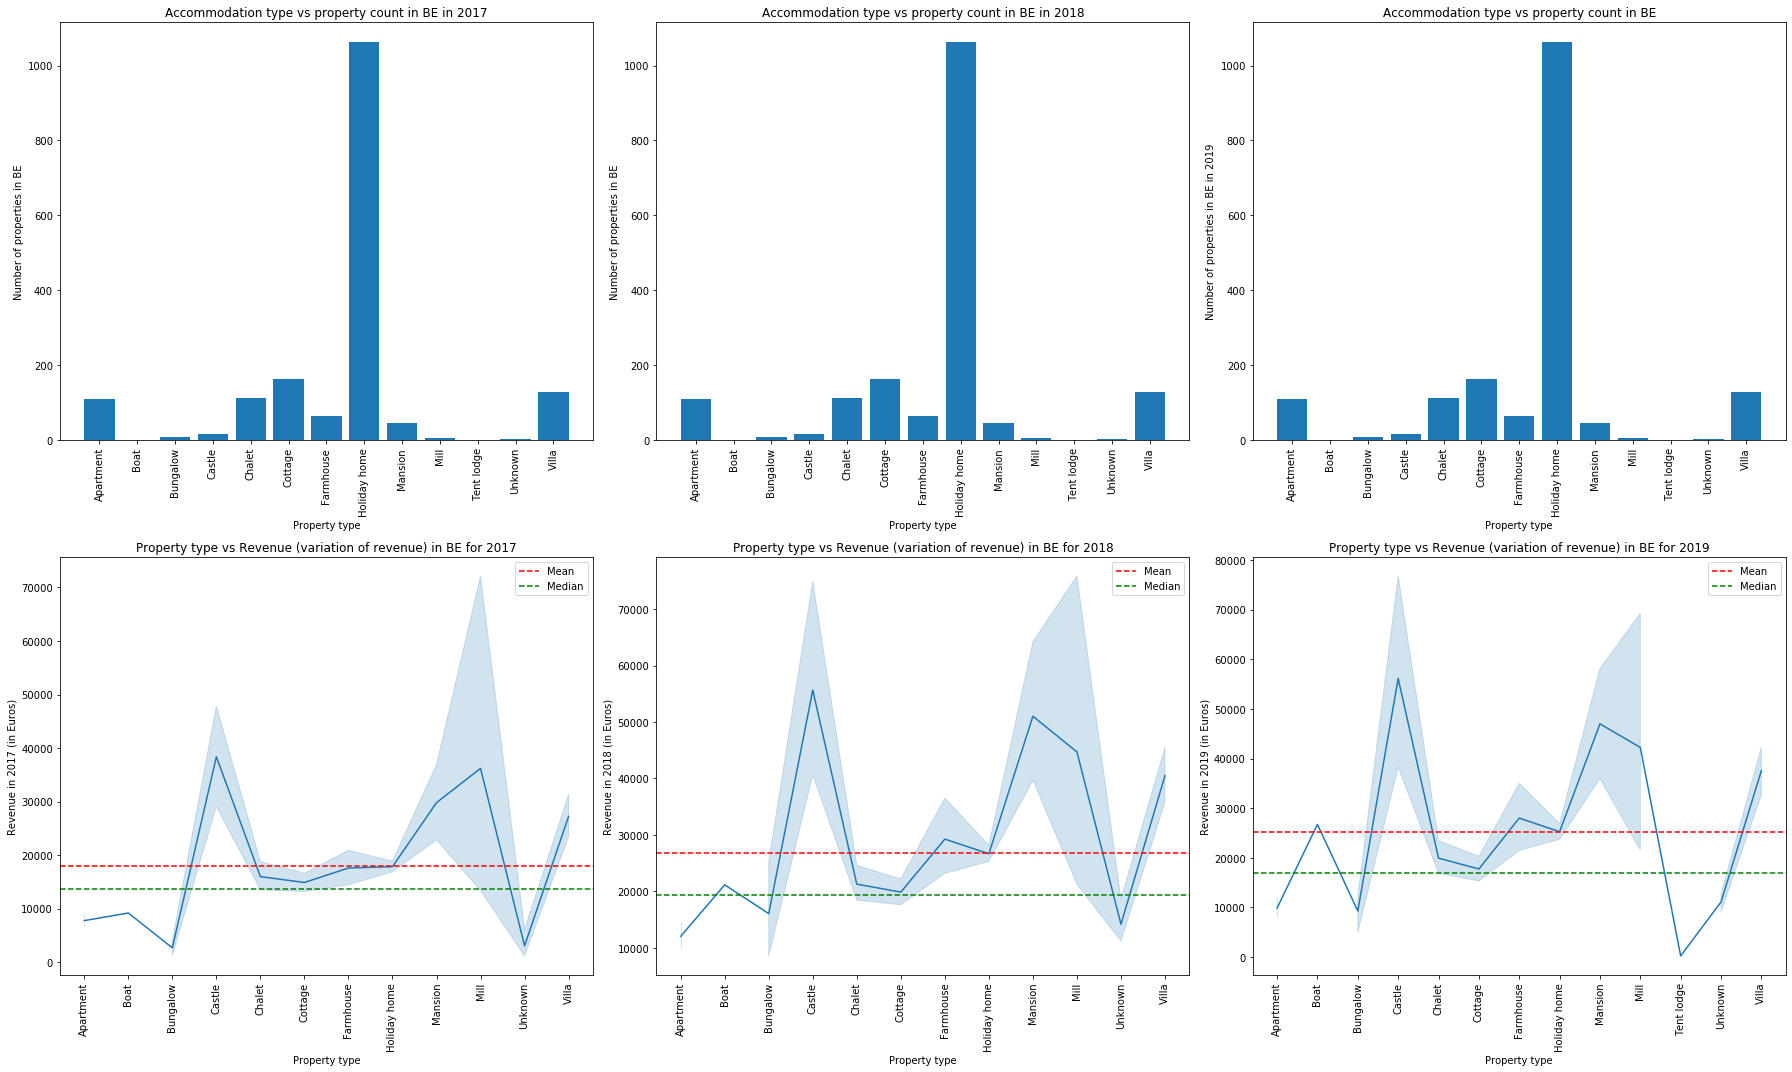

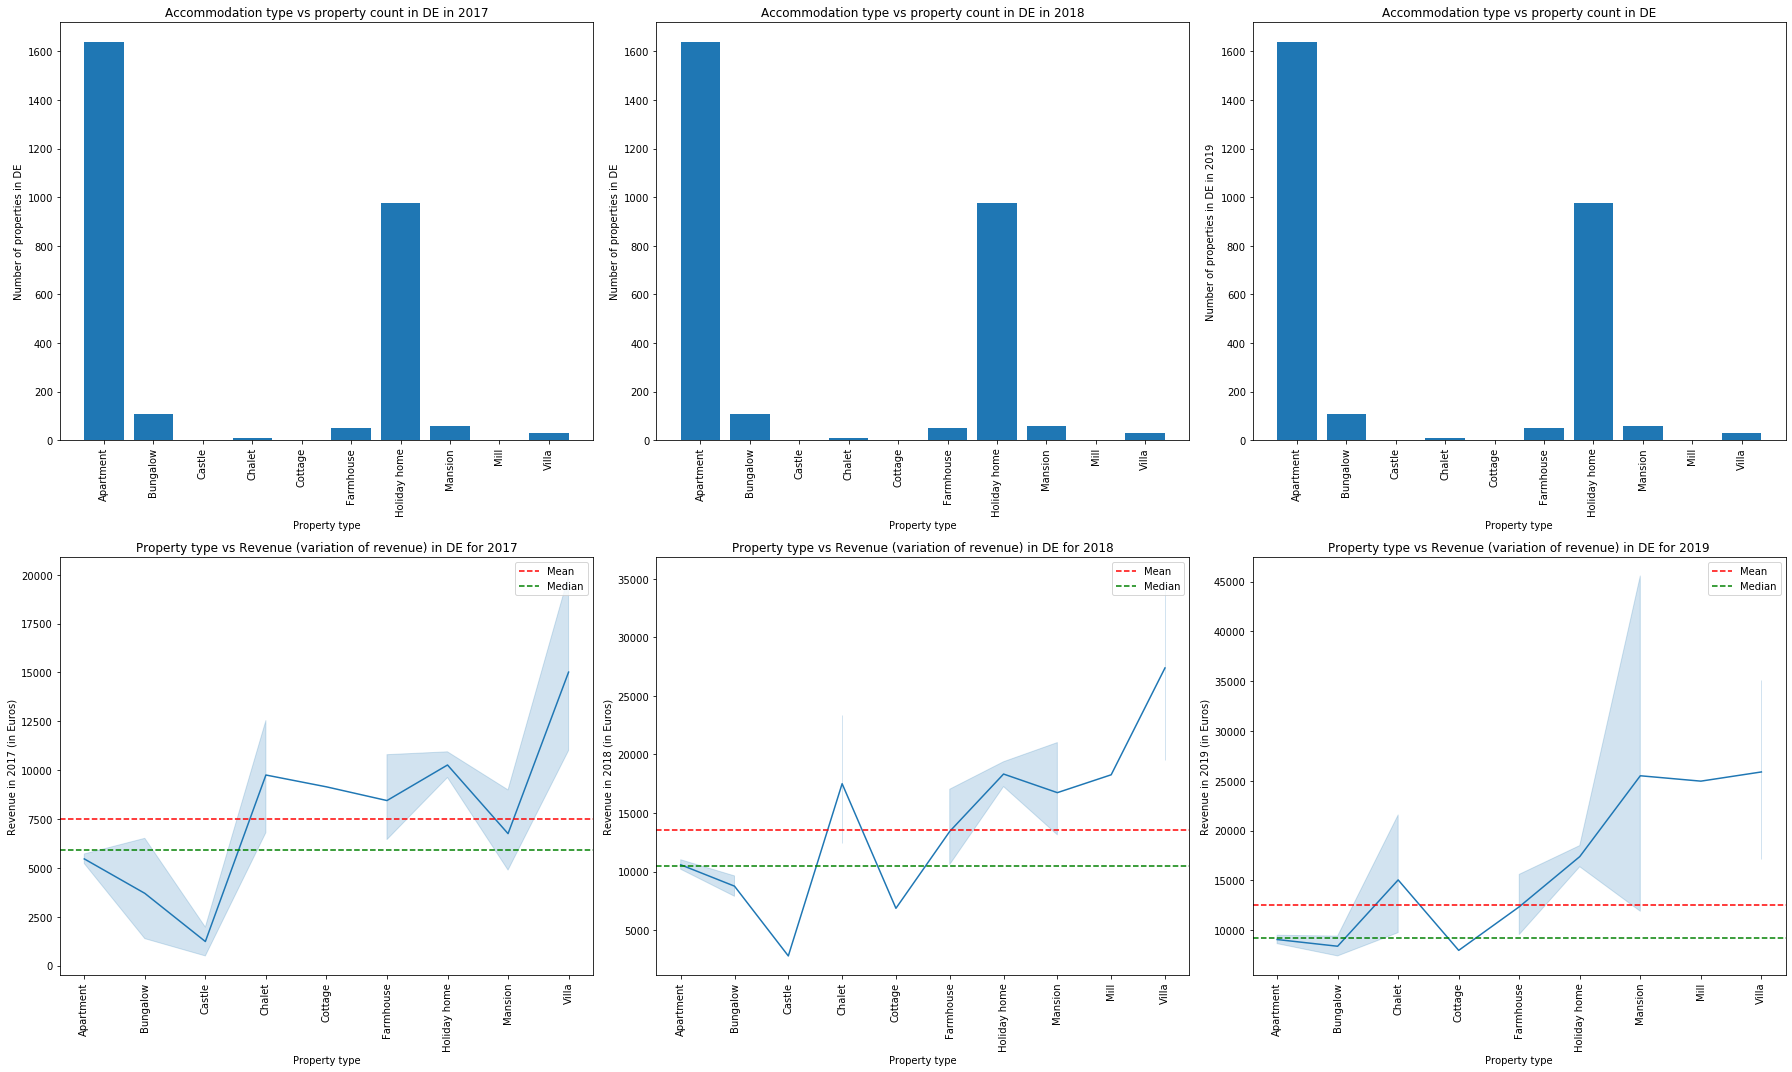

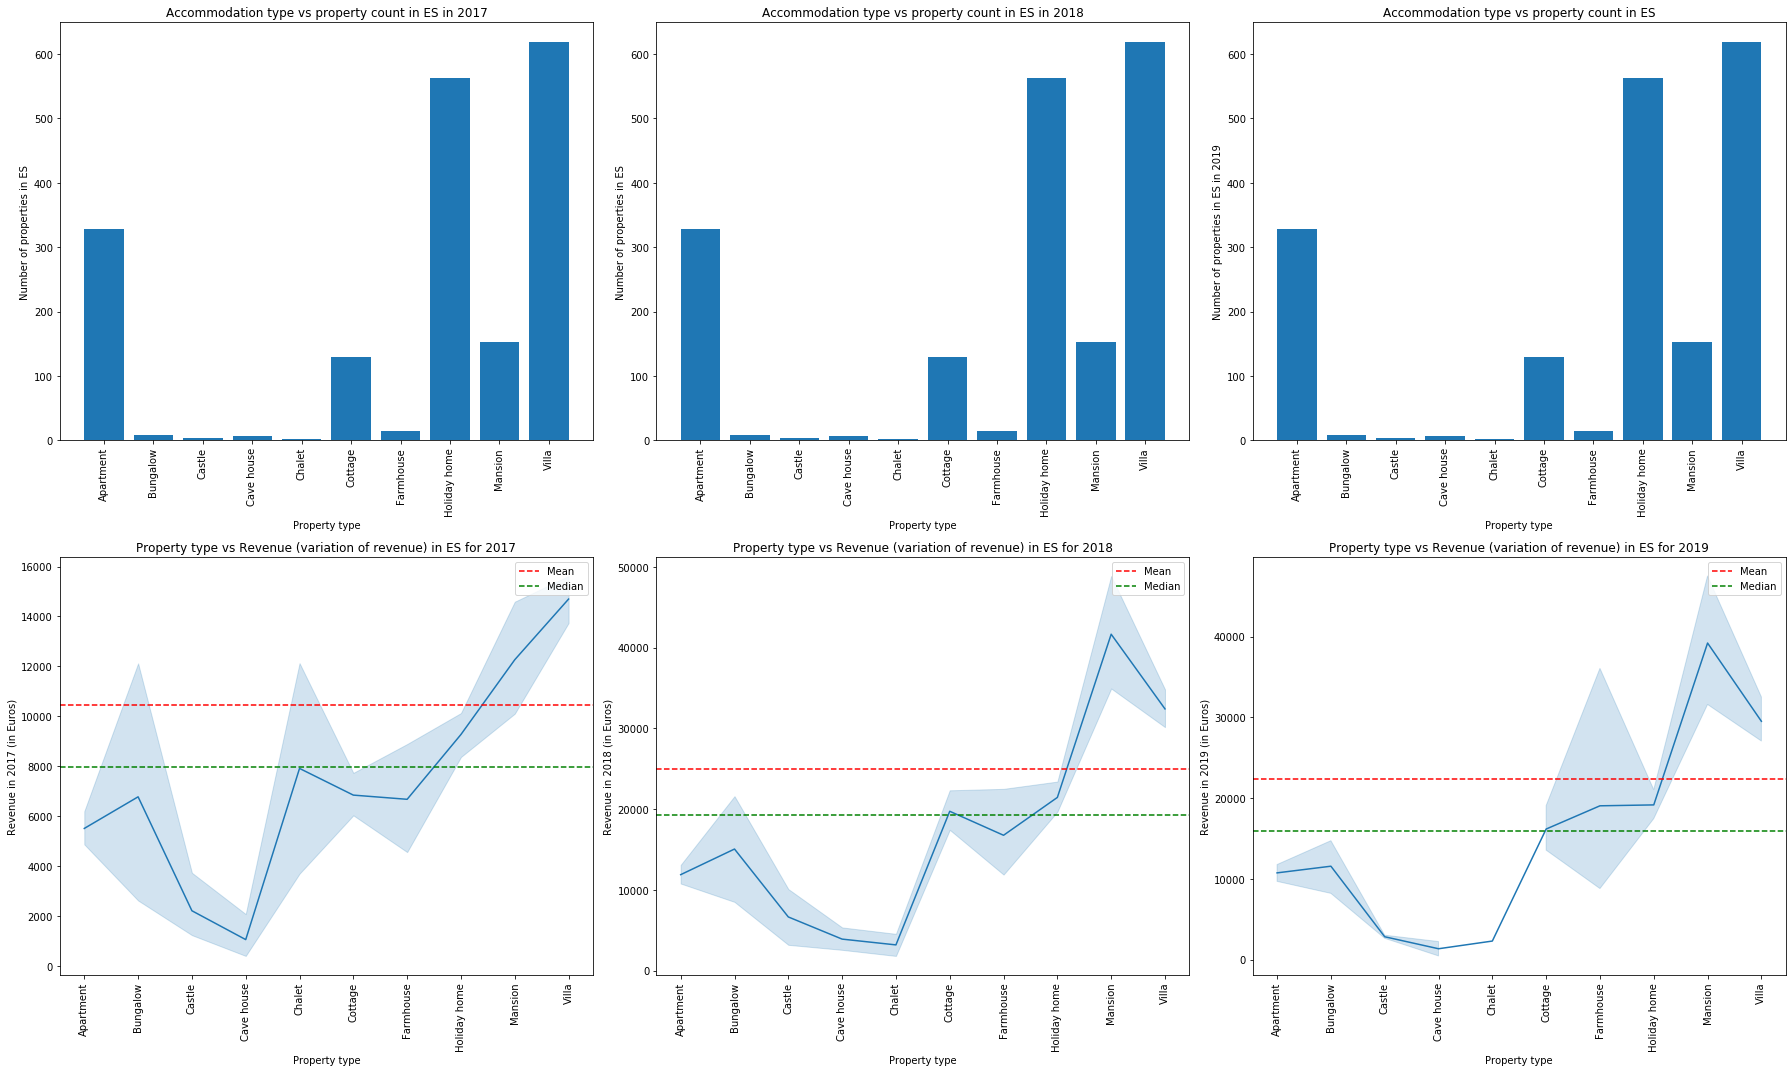

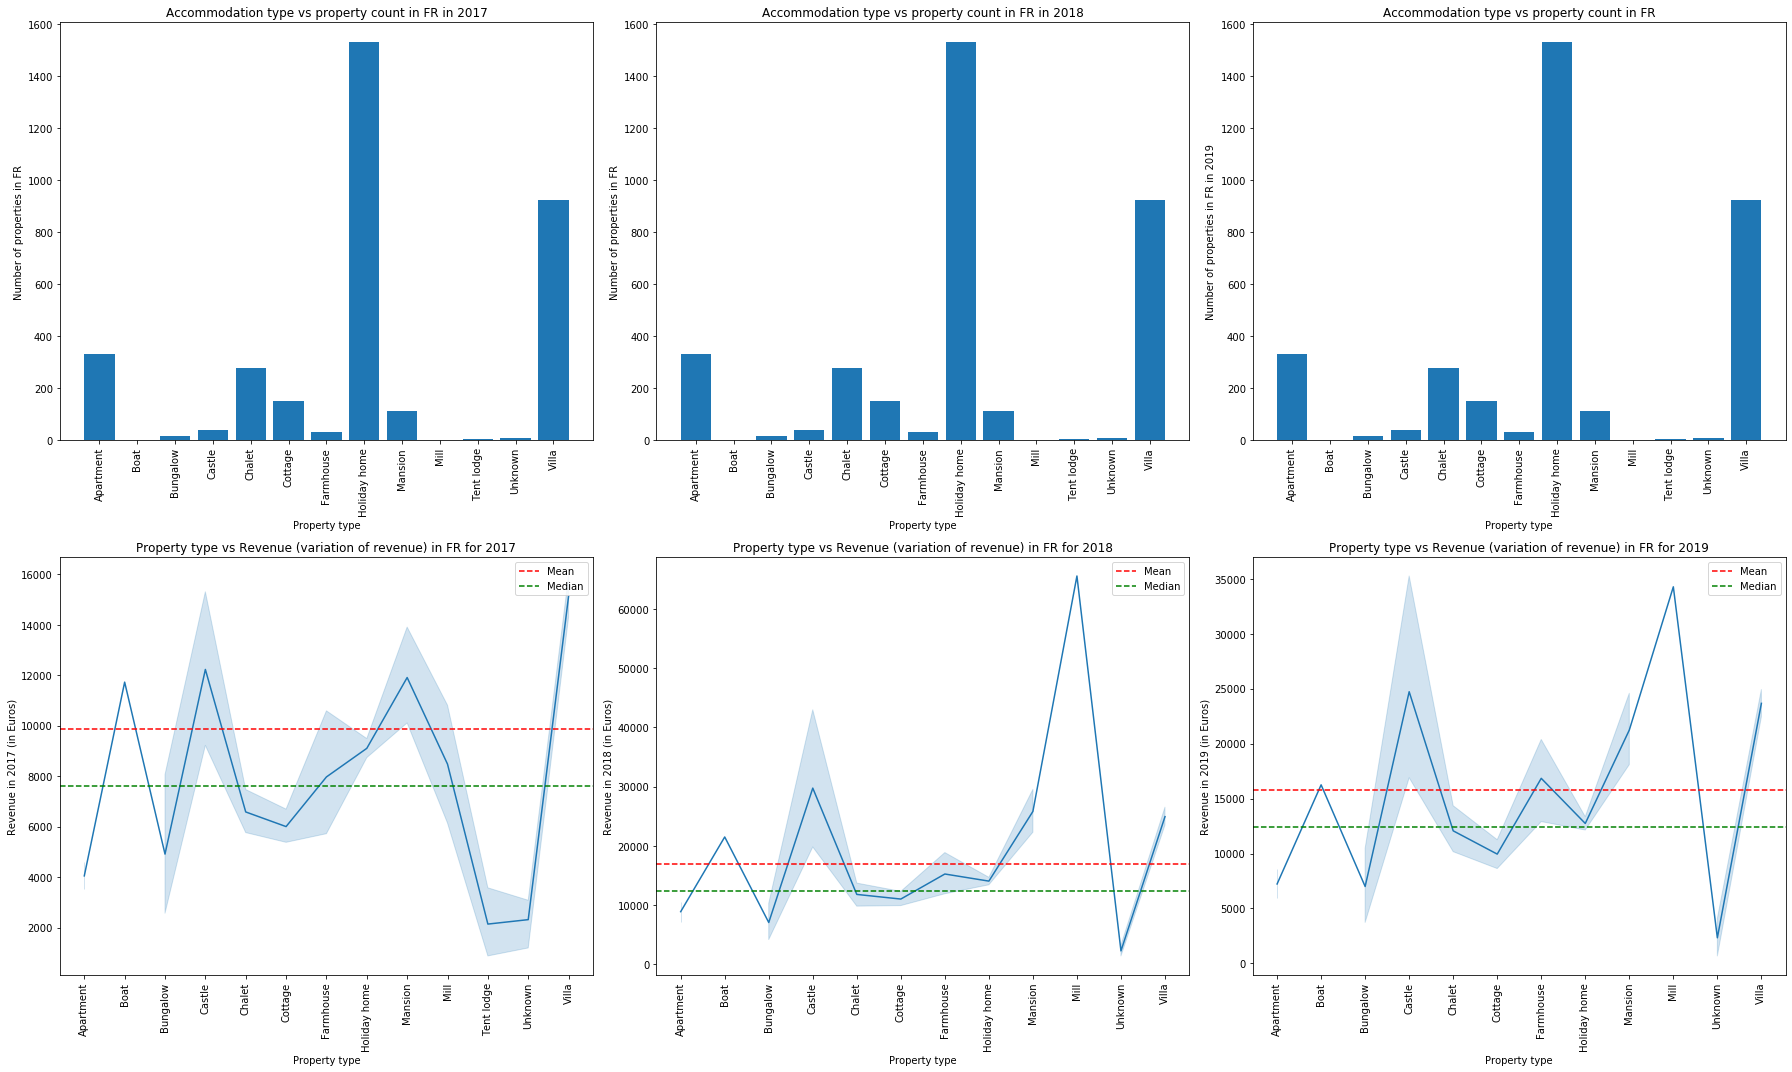

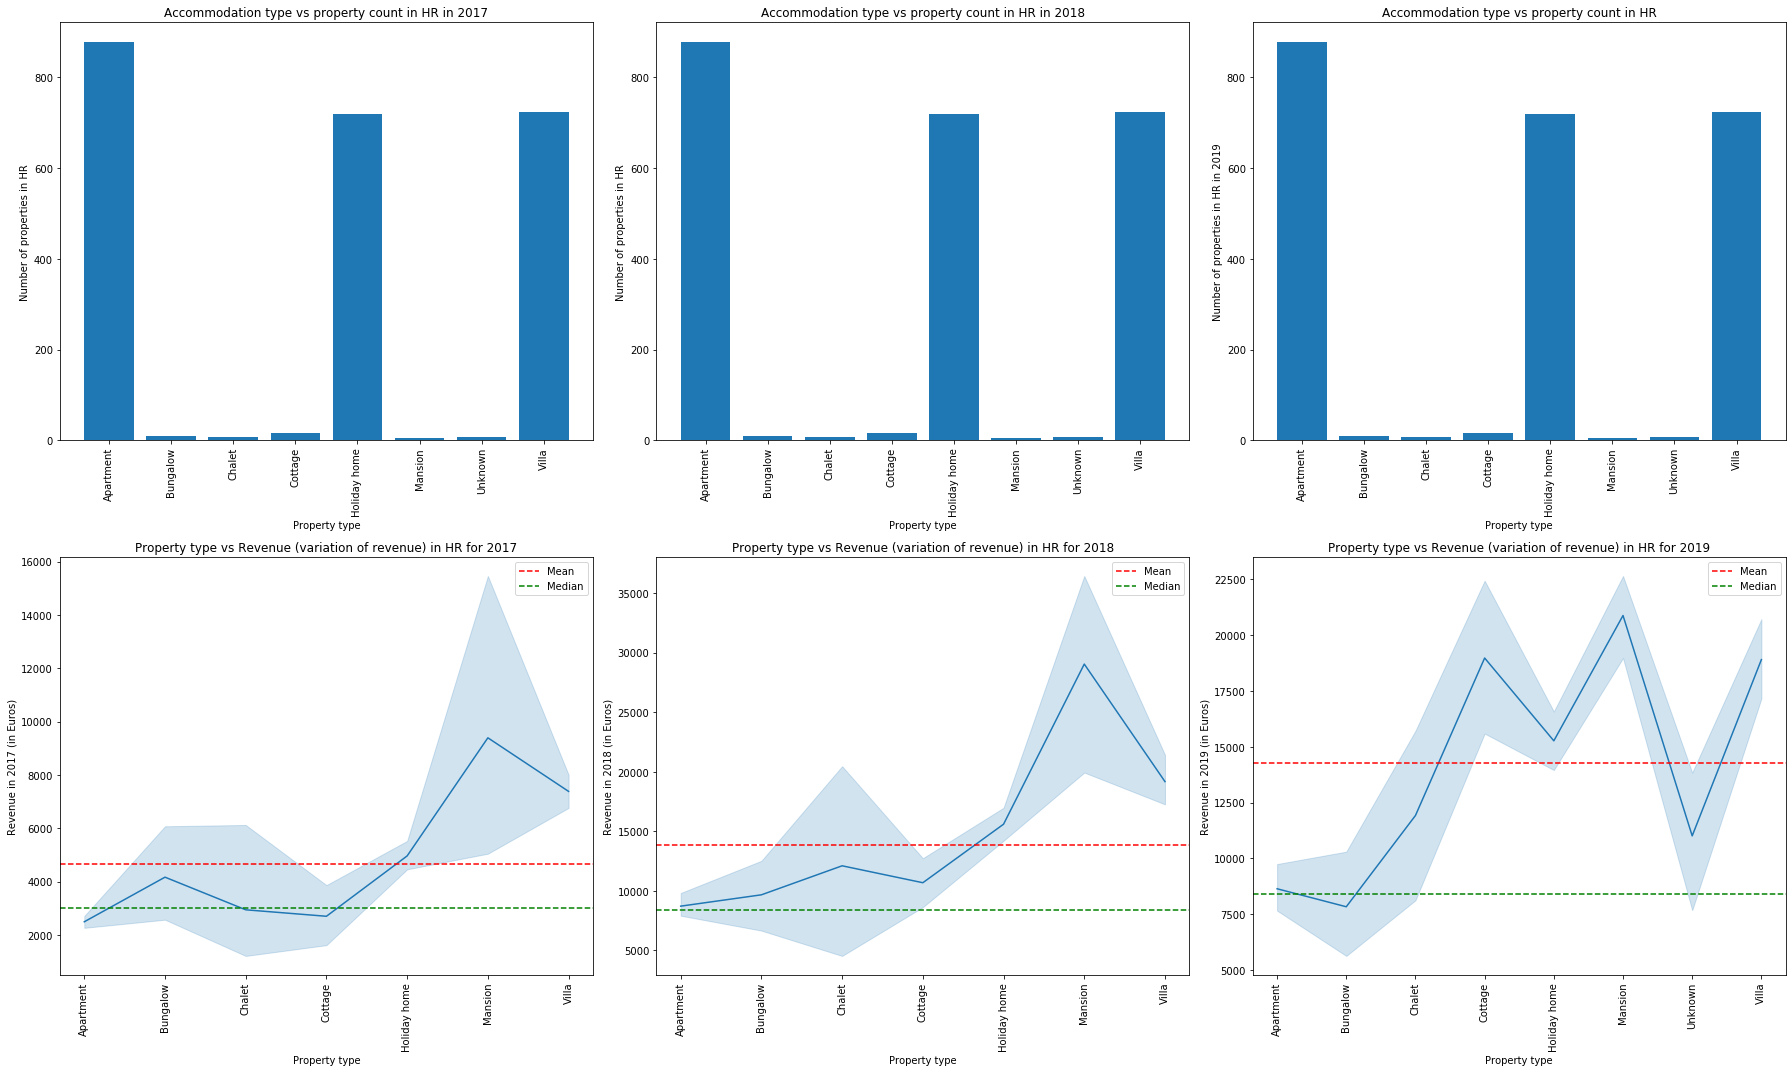

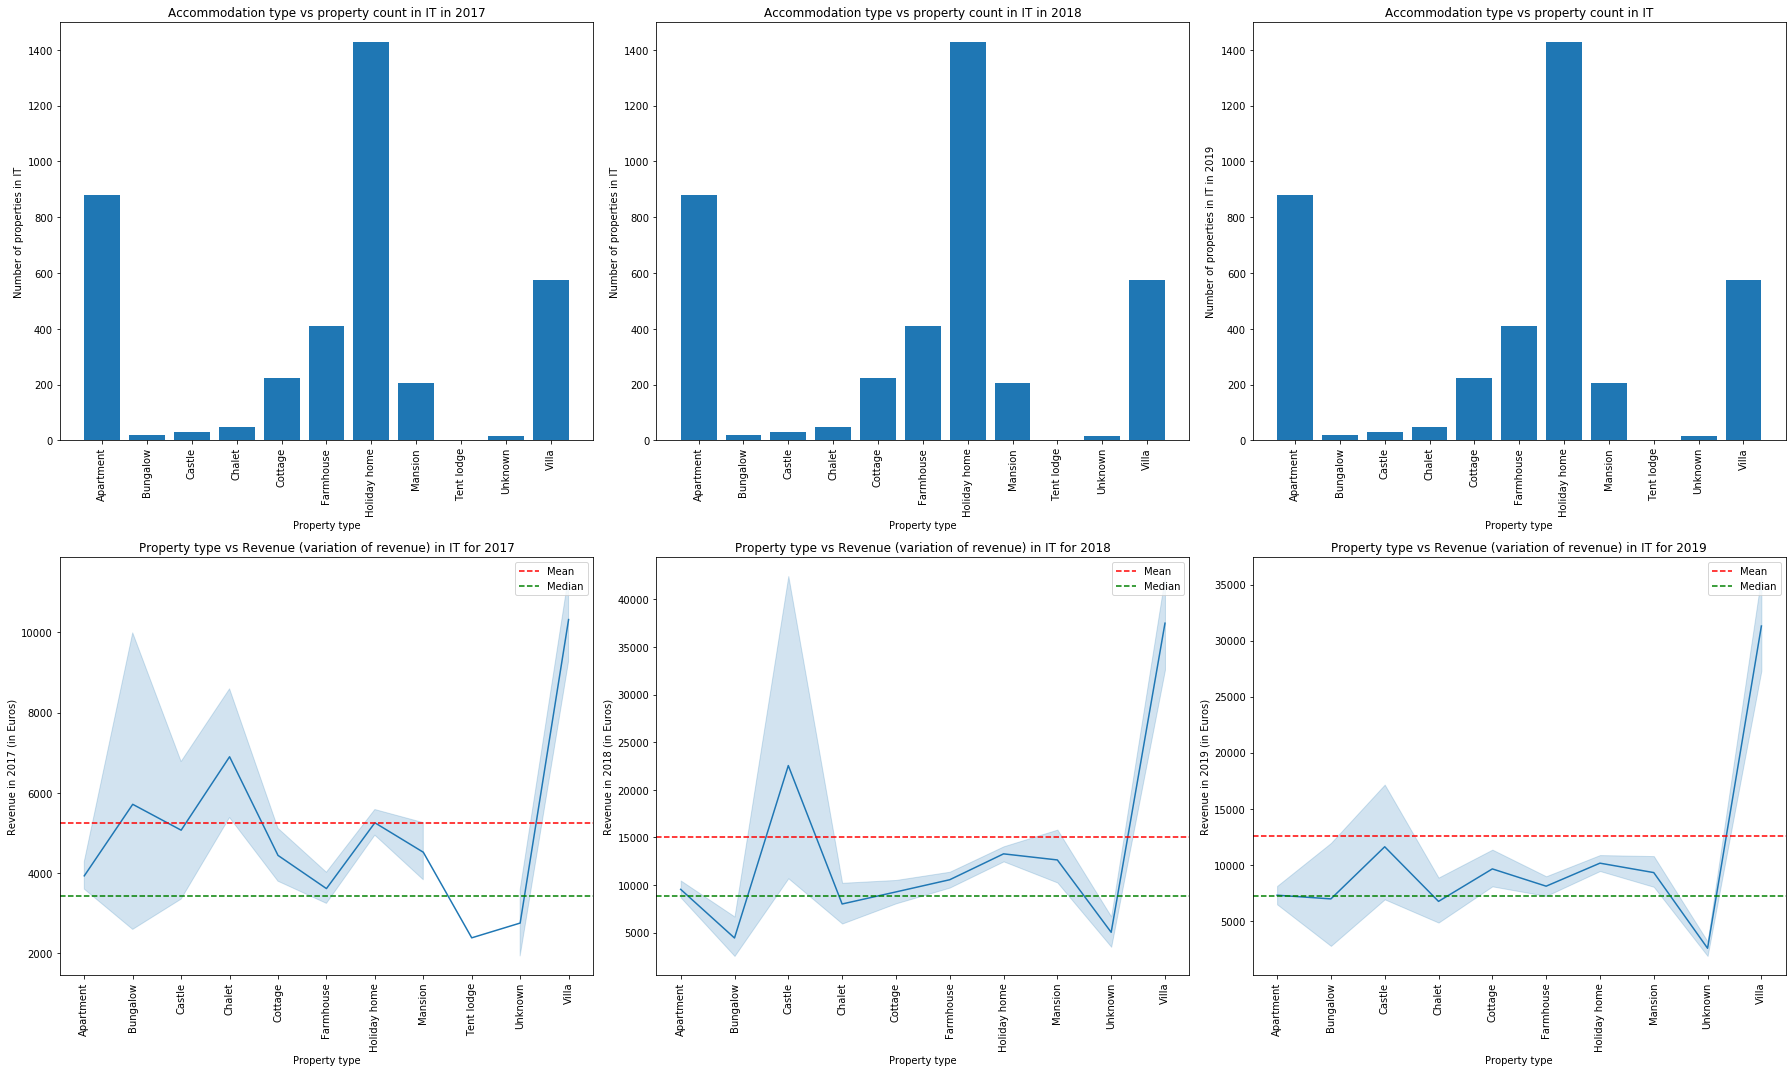

<Figure size 1800x1080 with 0 Axes>

In [15]:
for country in countries_list_to_analyse:
    country_df = property_df.query("COUNTRY == @country")
    country2017_df = country_df[country_df["total2017"]!=0]
    country2018_df = country_df[country_df["total2018"]!=0]
    country2019_df = country_df[country_df["total2019"]!=0]
    
    #---------------------- 2017 accommodation --------------------------------------------------------------
    acco_type_count_2017 = pd.DataFrame(country_df.groupby("ACCO_DESCRIPTION").count()["ACCOMMODATION_CODE"])
    acco_type_count_2017 = acco_type_count_2017.rename(columns={"ACCOMMODATION_CODE":"# Properties"})
    acco_type_count_2017 = acco_type_count_2017.reset_index()
    
    plt.subplot(2,3,1)
    plt.bar(acco_type_count_2017["ACCO_DESCRIPTION"], acco_type_count_2017["# Properties"])
    plt.xlabel("Property type")
    plt.xticks(rotation="vertical")
    plt.ylabel("Number of properties in "+country)
    plt.title("Accommodation type vs property count in "+country +" in 2017")
    
    plt.subplot(2,3,4)
    ax = sns.lineplot(x="ACCO_DESCRIPTION", y="total2017", markers=True, dashes=False, data=country2017_df)
    plt.axhline(country2017_df["total2017"].mean(), color="red", linestyle="--", label="Mean")
    plt.axhline(country2017_df["total2017"].median(), color="green", linestyle="--", label="Median")
    plt.xticks(rotation=90)
    plt.title("Property type vs Revenue (variation of revenue) in " + country + " for 2017")
    plt.xlabel("Property type")
    plt.ylabel("Revenue in 2017 (in Euros)")
    plt.legend(loc='best')
    plt.tight_layout()
    #---------------------- 2018 accommodation --------------------------------------------------------------
    acco_type_count_2018 = pd.DataFrame(country_df.groupby("ACCO_DESCRIPTION").count()["ACCOMMODATION_CODE"])
    acco_type_count_2018 = acco_type_count_2018.rename(columns={"ACCOMMODATION_CODE":"# Properties"})
    acco_type_count_2018 = acco_type_count_2018.reset_index()
    
    plt.subplot(2,3,2)
    plt.bar(acco_type_count_2018["ACCO_DESCRIPTION"], acco_type_count_2018["# Properties"])
    plt.xlabel("Property type")
    plt.xticks(rotation="vertical")
    plt.ylabel("Number of properties in "+country)
    plt.title("Accommodation type vs property count in "+country +" in 2018")
    
    plt.subplot(2,3,5)
    ax = sns.lineplot(x="ACCO_DESCRIPTION", y="total2018", markers=True, dashes=False, data=country2018_df)
    plt.axhline(country2018_df["total2018"].mean(), color="red", linestyle="--", label="Mean")
    plt.axhline(country2018_df["total2018"].median(), color="green", linestyle="--", label="Median")
    plt.xticks(rotation=90)
    plt.title("Property type vs Revenue (variation of revenue) in " + country + " for 2018")
    plt.xlabel("Property type")
    plt.ylabel("Revenue in 2018 (in Euros)")
    plt.legend(loc='best')

    plt.tight_layout()
    #---------------------- 2019 accommodation --------------------------------------------------------------
    acco_type_count_2019 = pd.DataFrame(country_df.groupby("ACCO_DESCRIPTION").count()["ACCOMMODATION_CODE"])
    acco_type_count_2019 = acco_type_count_2019.rename(columns={"ACCOMMODATION_CODE":"# Properties"})
    acco_type_count_2019 = acco_type_count_2019.reset_index()
    
    plt.subplot(2,3,3)
    plt.bar(acco_type_count_2019["ACCO_DESCRIPTION"], acco_type_count_2019["# Properties"])
    plt.xlabel("Property type")
    plt.xticks(rotation="vertical")
    plt.ylabel("Number of properties in "+country +" in 2019")
    plt.title("Accommodation type vs property count in "+country)
    
    plt.subplot(2,3,6)
    ax = sns.lineplot(x="ACCO_DESCRIPTION", y="total2019", markers=True, dashes=False, data=country2019_df)
    plt.axhline(country2019_df["total2019"].mean(), color="red", linestyle="--", label="Mean")
    plt.axhline(country2019_df["total2019"].median(), color="green", linestyle="--", label="Median")
    plt.xticks(rotation=90)
    plt.title("Property type vs Revenue (variation of revenue) in " + country + " for 2019")
    plt.xlabel("Property type")
    plt.ylabel("Revenue in 2019 (in Euros)")
    plt.legend(loc='best')

    plt.show()
    plt.tight_layout()
    
    

__OBSERVATIONS__

### Booking level data analysis

In [16]:
booking_df = pd.read_csv("C:/Users/payoj.jain/Documents/projects/Booking_level_data.csv")

In [17]:
booking_df['arrivaldate'] = pd.to_datetime(booking_df['arrivaldate'])
booking_df['departuredate'] = pd.to_datetime(booking_df['departuredate'])
booking_df['bookingdate'] = pd.to_datetime(booking_df['bookingdate'])

In [18]:
booking_df.head()

ACCOMMODATION_CODE BOOKING_ID BOOKING_STATUS  \
0         AT-5505-11  576245314        BOOKING   
1         AT-5505-11   76234292      CANCELLED   
2         AT-5505-11   1UHGKQGJ        BOOKING   
3         AT-5505-11  776298327      CANCELLED   
4         AT-5541-33   76052288        BOOKING   

       BOOKING_STATUS_DESCRIPTION arrivaldate departuredate bookingdate  \
0                         BOOKING  2019-07-27    2019-08-03  2018-12-03   
1       CANCELLATION (NO PAYMENT)  2019-10-05    2019-10-12  2018-11-14   
2                         BOOKING  2019-10-05    2019-10-12  2019-08-21   
3  CANCELLATION WITHOUT INSURANCE  2019-10-12    2019-10-19  2019-01-28   
4                         BOOKING  2019-03-02    2019-03-09  2018-03-07   

       gbv  no_persons  no_child  no_adults  
0  2710.75          27         0         24  
1     0.00          19        10          9  
2  1839.04          23        12         11  
3   567.00          24        17          7  
4  2288.59          19         6         11

In [19]:
booking_df.query('no_child >= 1').count()['BOOKING_ID']/booking_df['BOOKING_ID'].count()

0.3633788655051687

In [20]:
booking_df['BOOKING_ID'].count()

385881

__OBSERVATION__

In [21]:
bookings_without_cancellation = booking_df[booking_df['BOOKING_STATUS'] == 'BOOKING']

In [22]:
bookings_without_cancellation[bookings_without_cancellation['arrivaldate'] >= '2018-01-01'].count()['BOOKING_ID']

349147

In [23]:
bookings_without_cancellation[bookings_without_cancellation['arrivaldate'] < '2019-01-01'].count()['BOOKING_ID']

143846

In [24]:
bookings = pd.merge(bookings_without_cancellation, property_df[['ACCOMMODATION_CODE','ACCO_DESCRIPTION', 'COUNTRY']], on ='ACCOMMODATION_CODE', how = 'left')

In [25]:
bookings["days_of_stay"] = (bookings["departuredate"] - bookings["arrivaldate"])/np.timedelta64(1,'D')
bookings["days_of_stay"].head()

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
Name: days_of_stay, dtype: float64

In [26]:
bookings = bookings[bookings["ACCO_DESCRIPTION"].notnull()]
bookings["price"] = bookings["gbv"]/bookings["days_of_stay"]

In [27]:
booking_count_df = pd.DataFrame(bookings.groupby(["ACCOMMODATION_CODE"]).count()["BOOKING_ID"])
booking_count_df.columns = ["bookings_count"]
booking_count_df = booking_count_df.reset_index()
booking_count_df.head()

ACCOMMODATION_CODE  bookings_count
0         AT-1050-01               1
1         AT-2572-01              20
2         AT-4553-01              10
3         AT-4573-02               8
4         AT-4813-01               2

In [28]:
property_df = pd.merge(property_df, pd.DataFrame(bookings.groupby(["ACCOMMODATION_CODE"])["price"].mean()),how="left", on="ACCOMMODATION_CODE") 
property_df.head()

ACCOMMODATION_CODE  ACCOMMODATION_TYPE ACCO_DESCRIPTION  NUMBER_OF_PERSONS  \
0         AT-1050-01                   1        Apartment                  4   
1         AT-1115-01                   3           Chalet                 10   
2         AT-1160-01                   1        Apartment                  2   
3         AT-1160-02                   1        Apartment                  2   
4         AT-1160-03                   1        Apartment                  4   

   BEDROOM_COUNT  BATHROOM_COUNT  HAS_WIFI  HAS_POOL  HAS_PRIVATE_POOL  \
0              1               1         1         0                 0   
1              0               0         0         0                 0   
2              2               1         1         0                 0   
3              1               1         1         0                 0   
4              3               1         1         0                 0   

   HAS_SHARED_POOL  HAS_INDOOR_POOL  HAS_OUTDOOR_POOL  IS_DETACHED  HAS_SAUNA  \
0                0                0                 0            0          0   
1                0                0                 0            1          0   
2                0                0                 0            0          0   
3                0                0                 0            0          0   
4                0                0                 0            0          0   

   HAS_JACUZZI  IS_SKIING  IS_ON_A_FARM    X2017.x  X2018.x  X2019.x  \
0            0          0             0  1068.4800      0.0      0.0   
1            0          0             0  4474.4400      0.0      0.0   
2            0          0             0   358.3000      0.0      0.0   
3            0          0             0   518.9500      0.0      0.0   
4            0          0             0  2202.5825      0.0      0.0   

    X2017.y  X2018.y  X2019.y  total2019  total2018  total2017  Total_HO  \
0  2627.118  432.358      0.0        0.0    432.358  3695.5980  3059.476   
1     0.000    0.000      0.0        0.0      0.000  4474.4400     0.000   
2   329.472    0.000      0.0        0.0      0.000   687.7720   329.472   
3   123.266    0.000      0.0        0.0      0.000   642.2160   123.266   
4   430.144    0.000      0.0        0.0      0.000  2632.7265   430.144   

    Total_BV   LATITUDE  LONGITUDE        max  ELEVATION  if_near_coast  \
0  1068.4800  48.184128  16.367247  3695.5980      207.0              0   
1  4474.4400  47.038075  10.610737  4474.4400     1444.0              0   
2   358.3000  48.216322  16.312146   687.7720      232.0              0   
3   518.9500  48.216322  16.312146   642.2160      232.0              0   
4  2202.5825  48.216320  16.312150  2632.7265      232.0              0   

   distance_from_coast  nearest_coastal_longitude  nearest_coastal_latitude  \
0                  NaN                        NaN                       NaN   
1                  NaN                        NaN                       NaN   
2                  NaN                        NaN                       NaN   
3                  NaN                        NaN                       NaN   
4                  NaN                        NaN                       NaN   

  COUNTRY  price  
0      AT    0.0  
1      AT    NaN  
2      AT    NaN  
3      AT    NaN  
4      AT    NaN

In [29]:
property_df = pd.merge(property_df, booking_count_df, how="left", on="ACCOMMODATION_CODE")

In [30]:
bookings_2019 = bookings[bookings['arrivaldate'] >= '2019-01-01']
booking_count_2019 = bookings_2019.groupby(['COUNTRY']).count()['BOOKING_ID']
booking_count_2019 = booking_count_2019.reset_index()
booking_count_2019 = booking_count_2019.rename(columns={'BOOKING_ID': '# Bookings'})

In [31]:
bookings_2018 = bookings[bookings['arrivaldate'] < '2019-01-01']
booking_count_2018 = bookings_2018.groupby(['COUNTRY']).count()['BOOKING_ID']
booking_count_2018 = booking_count_2018.reset_index()
booking_count_2018 = booking_count_2018.rename(columns={'BOOKING_ID': '# Bookings'})

In [32]:
booking_count_2018.head()

COUNTRY  # Bookings
0      AT       11283
1      BE       21457
2      BQ           4
3      CH         586
4      CW          39

In [33]:
country_count[["COUNTRY", "# Properties"]].transpose()

0     1   2    3   4    5     6   7     8     9   10   11  \
COUNTRY         AT    BE  BQ   CH  CW   CZ    DE  DK    ES    FR   GB   GR   
# Properties  2351  1727  20  215  59  392  2874   2  1825  3433  286  297   

                12  13  14    15  16    17   18   19  20  21  22  23  
COUNTRY         HR  HU  IE    IT  LU    NL   PL   PT  SE  SI  SK  TR  
# Properties  2367  18  37  3832   8  2284  145  337  11  80   7  17

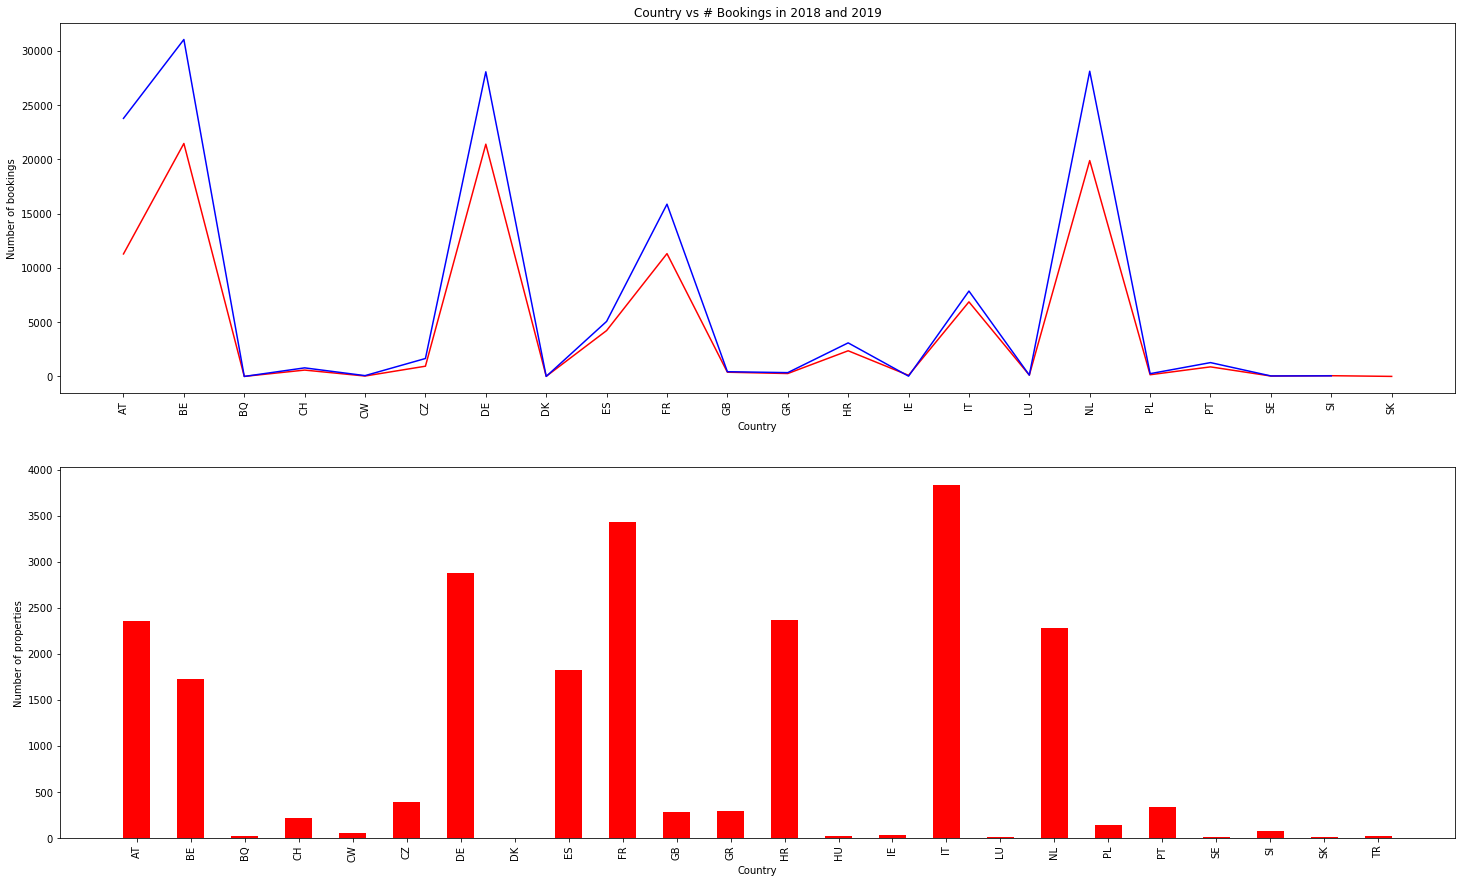

In [34]:
plt.subplot(2,1,1)
plt.plot(booking_count_2018["COUNTRY"], booking_count_2018['# Bookings'] ,color = 'red', label = '2018')
plt.plot(booking_count_2019["COUNTRY"], booking_count_2019['# Bookings'] ,color = 'blue', label = '2019')
# country_count.plot(x = "COUNTRY", y = "# Properties" , kind="bar", color = 'green', ax = ax2, label = 'Property count')
plt.xlabel("Country")
plt.xticks(rotation="vertical")
plt.ylabel("Number of bookings")
plt.title("Country vs # Bookings in 2018 and 2019")    

plt.subplot(2,1,2)
plt.bar(country_count["COUNTRY"], country_count["# Properties"], color = 'red', label = 'Property count', width=0.5)
plt.xlabel("Country")
plt.xticks(rotation="vertical")
plt.ylabel("Number of properties")
plt.show()


AT 23768


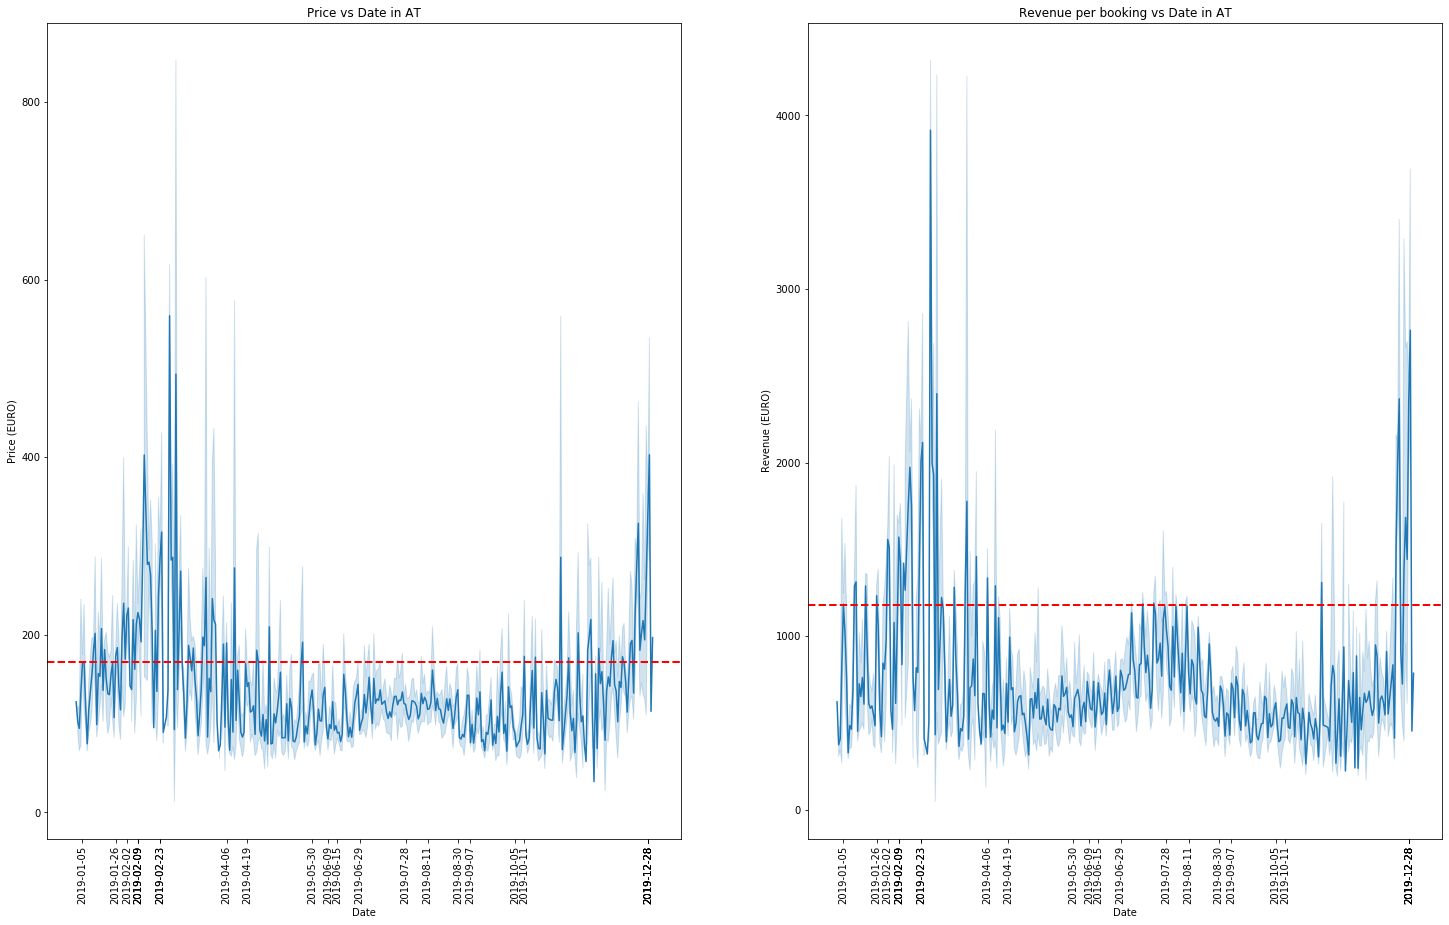

BE 31033


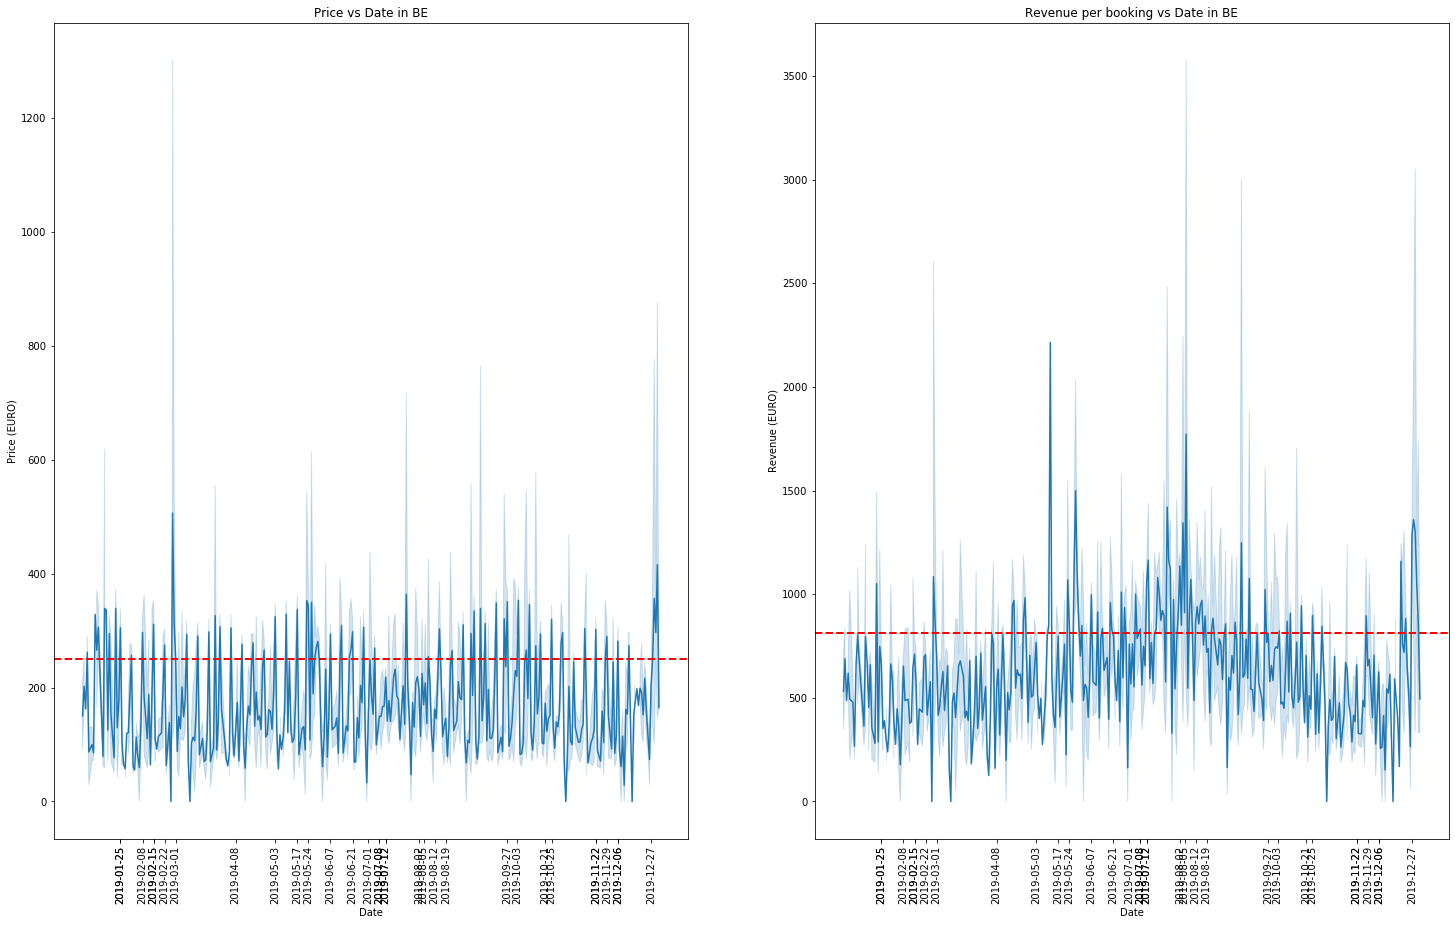

DE 28057


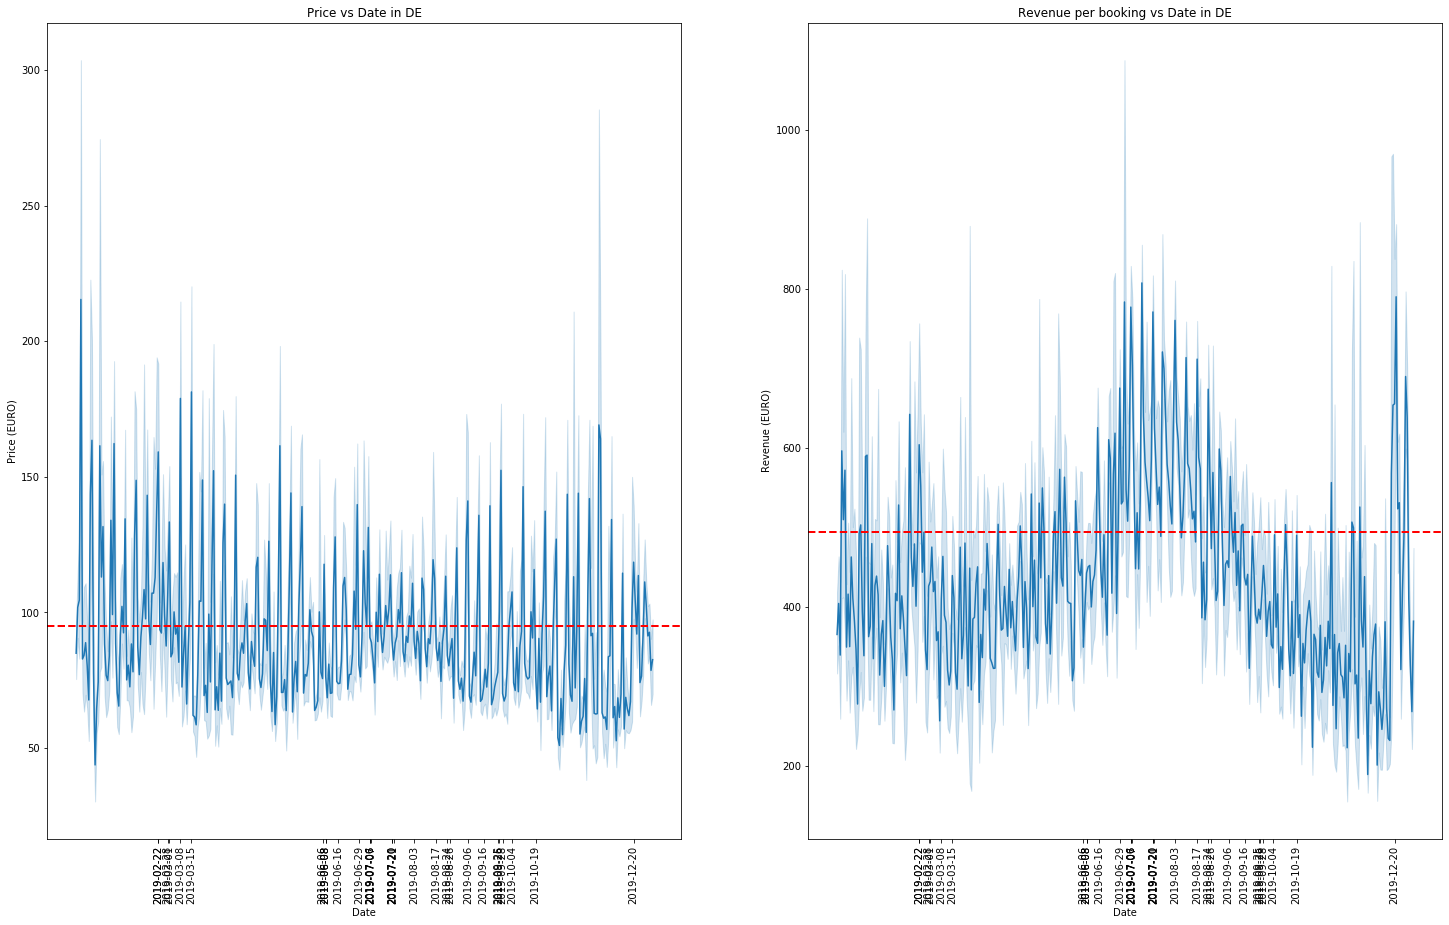

ES 5068


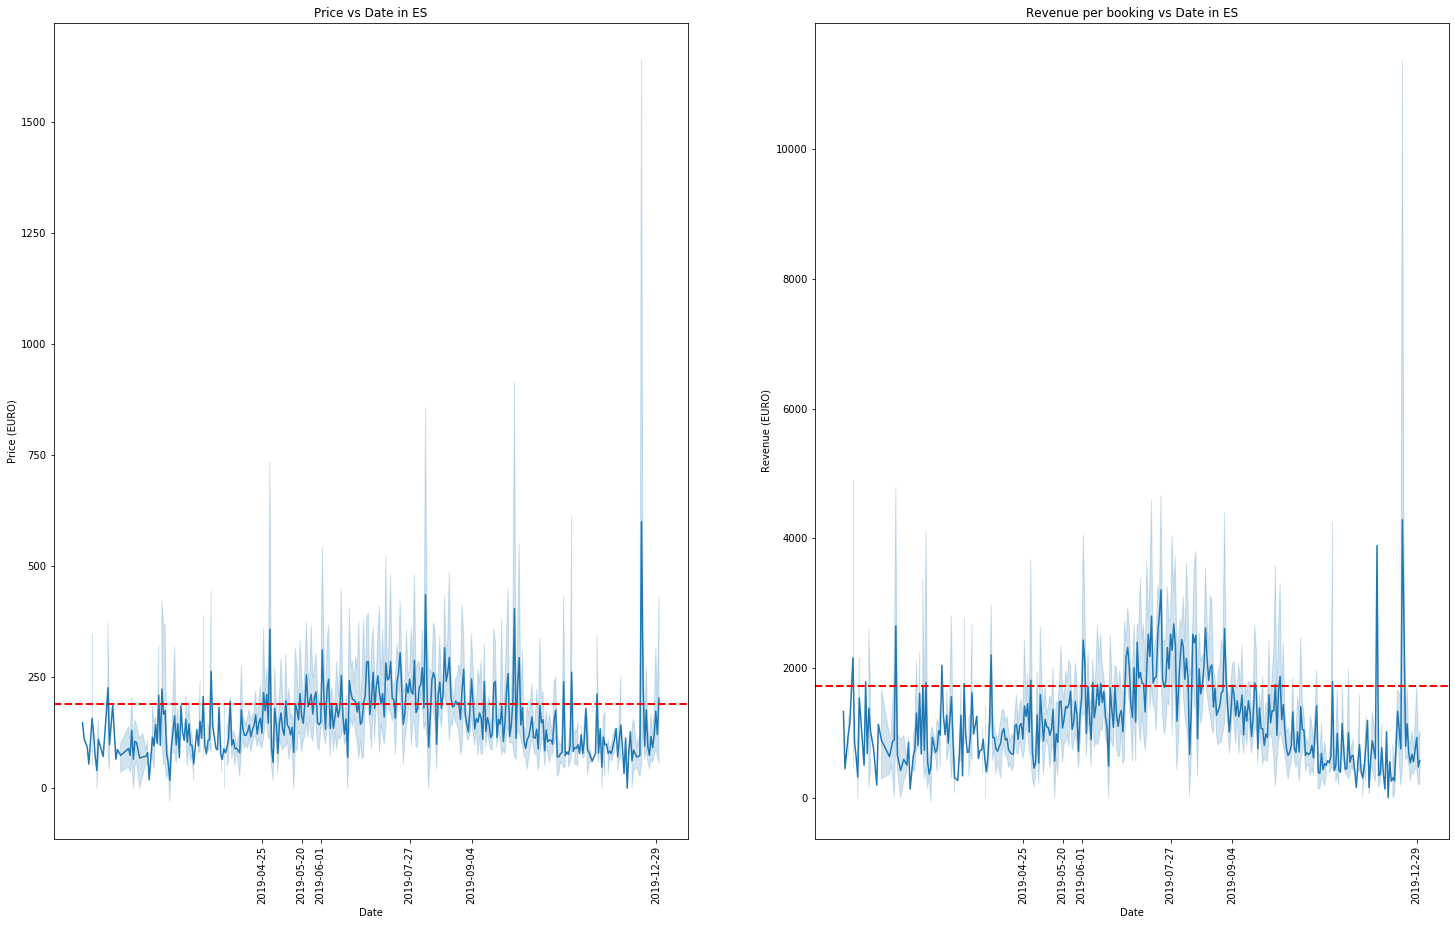

FR 15865


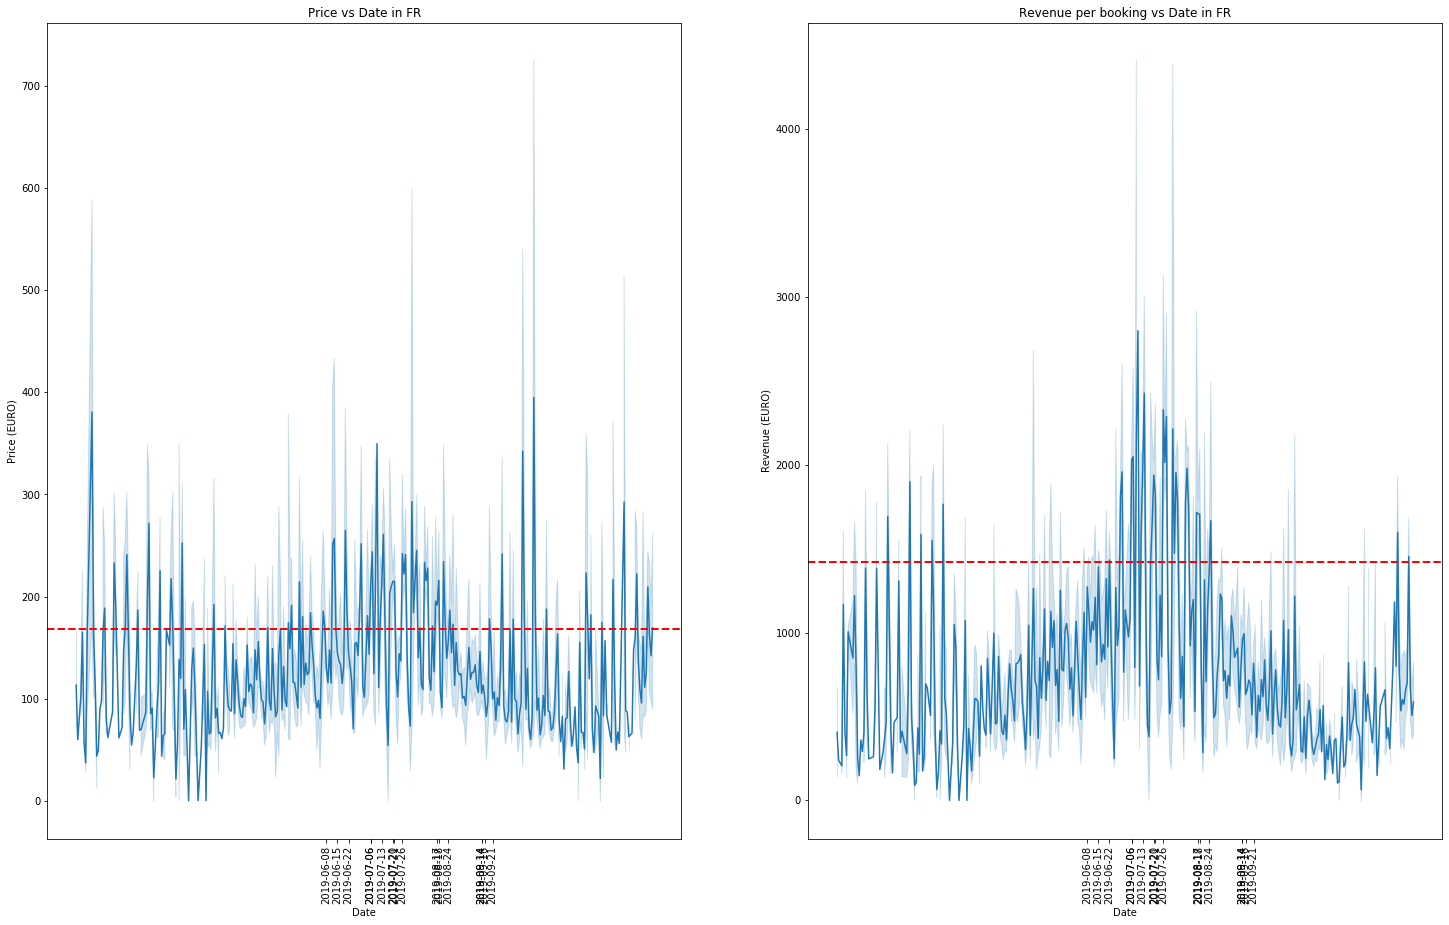

HR 3092


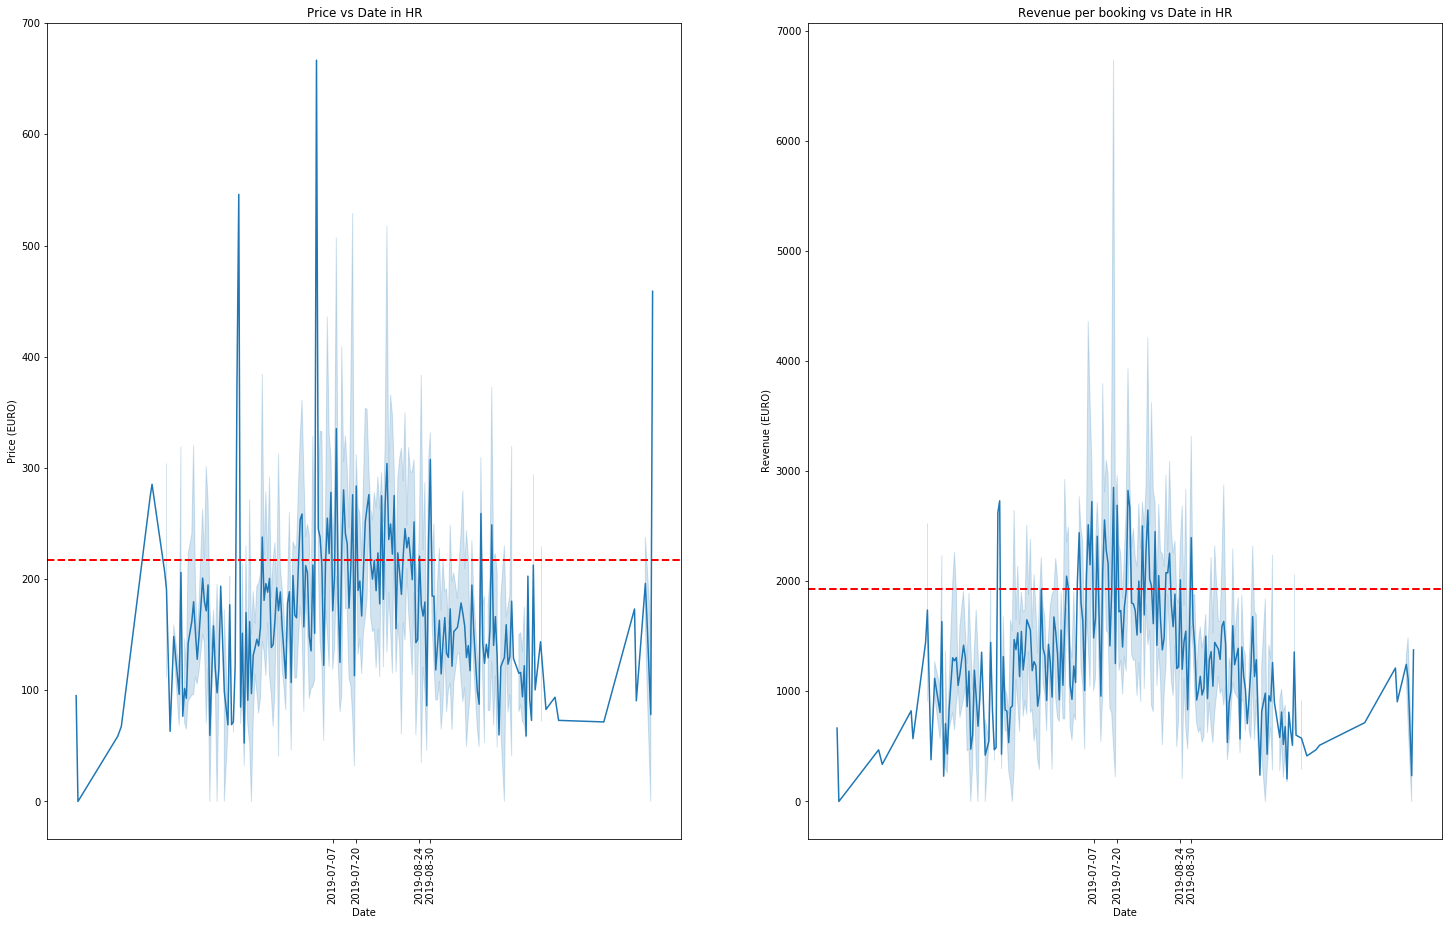

IT 7864


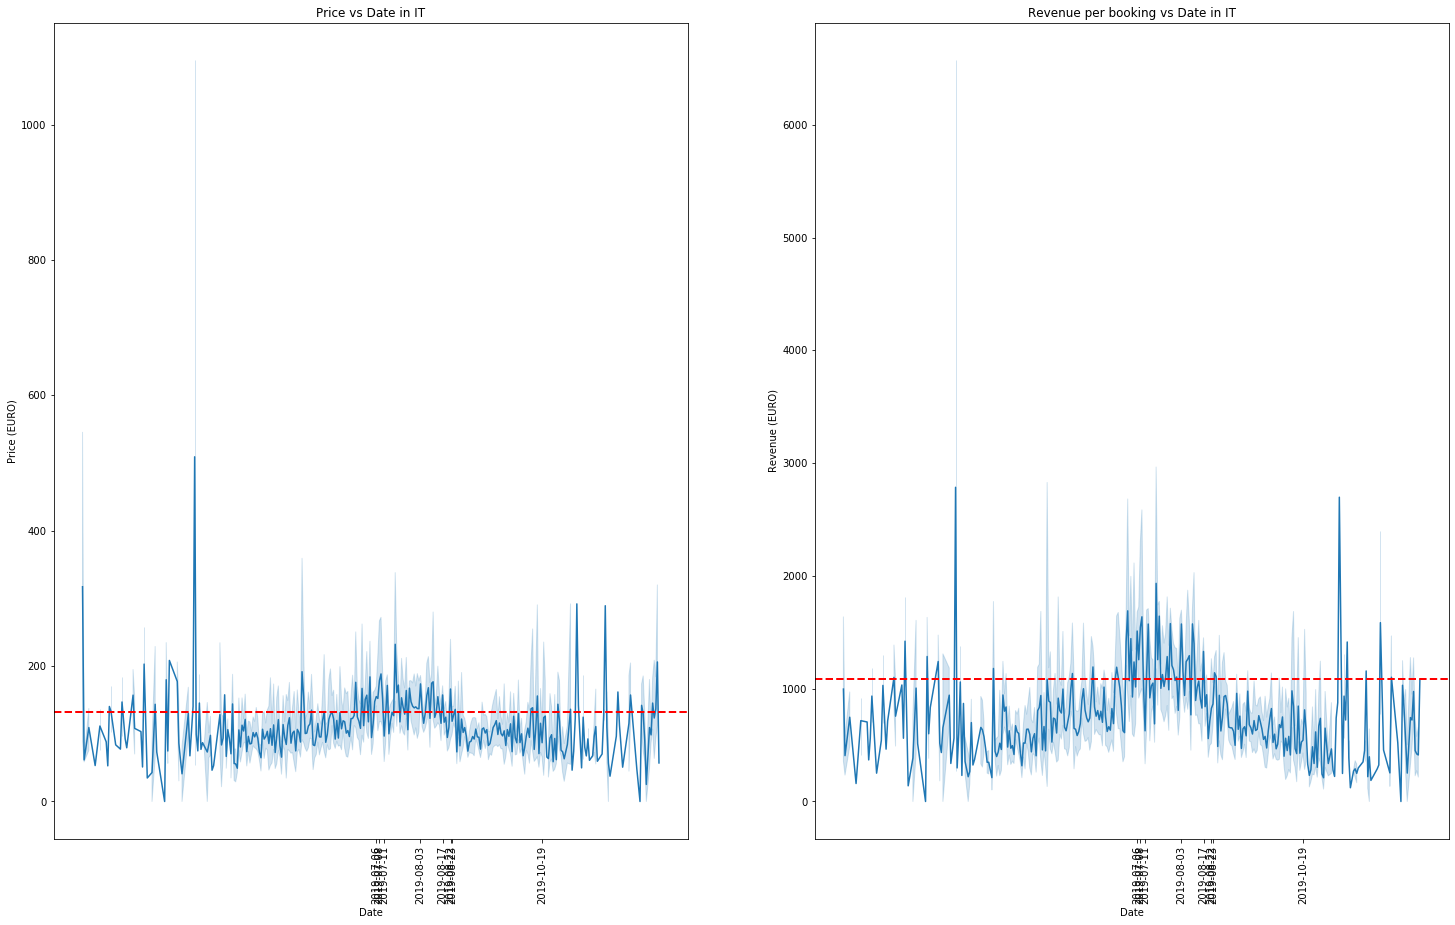

In [35]:
i = 0
for country in countries_list_to_analyse:
    i += 1
    country_data = bookings_2019.query('COUNTRY == @country')
    print(country, len(country_data.values))
    plt.subplot(1,2,1)
    ax = sns.lineplot(x = "arrivaldate", y = "price", markers = False, dashes = False, data = country_data)
    plt.axhline(country_data['price'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    ax.set(xticks=country_data.arrivaldate[1::1000])
    plt.xticks(rotation=90)
    plt.title('Price vs Date in '+country)
    plt.xlabel('Date')
    plt.ylabel('Price (EURO)')
#     plt.legend(loc='best')
    plt.subplot(1,2,2)
    ax = sns.lineplot(x = "arrivaldate", y = "gbv", markers = False, dashes = False, data = country_data)
    plt.axhline(country_data['gbv'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    ax.set(xticks=country_data.arrivaldate[1::1000])
    plt.xticks(rotation=90)
    plt.title('Revenue per booking vs Date in '+country)
    plt.xlabel('Date')
    plt.ylabel('Revenue (EURO)')
    plt.show()

In [36]:
matplotlib.rcParams['figure.figsize'] = (25, 10)
matplotlib.rcParams['font.size'] = 10

__OBSERVATION__ : Apartment type has more number of bookings in 2 years than all other accommodation types combined 

In [37]:
acco = pd.DataFrame(bookings.groupby(['COUNTRY', 'ACCO_DESCRIPTION']).count()['BOOKING_ID'])
acco.reset_index()

COUNTRY ACCO_DESCRIPTION  BOOKING_ID
0        AT        Apartment       19726
1        AT         Bungalow          54
2        AT           Chalet        7634
3        AT        Farmhouse         429
4        AT     Holiday home        5816
..      ...              ...         ...
141      SI           Chalet           1
142      SI     Holiday home           9
143      SI            Villa           4
144      SK        Apartment           2
145      SK           Chalet           3

[146 rows x 3 columns]

In [38]:
acco.query('COUNTRY == "IT"')

BOOKING_ID
COUNTRY ACCO_DESCRIPTION            
IT      Apartment               2367
        Bungalow                  77
        Castle                   142
        Chalet                   270
        Cottage                 1166
        Farmhouse               1835
        Holiday home            6673
        Mansion                  689
        Unknown                   90
        Villa                   1425

In [39]:
bookings.query('COUNTRY == "IT"').count()['BOOKING_ID']

14734

### Data Processing

In [40]:
corr_cols = ['beds', 'bathrooms', 'accommodates', 'room_type', 'minimum_nights', 'cancellation_policy', 'require_guest_phone_verification', 'host_has_profile_pic', 'extra_guest_ratio',
           'price_surge_percent', 'price_std_percent','price', 'price_per_person', 'booking_rate(%)', 'daily_revenue','revenue_per_guest']

In [41]:
property_df.columns

Index(['ACCOMMODATION_CODE', 'ACCOMMODATION_TYPE', 'ACCO_DESCRIPTION',
       'NUMBER_OF_PERSONS', 'BEDROOM_COUNT', 'BATHROOM_COUNT', 'HAS_WIFI',
       'HAS_POOL', 'HAS_PRIVATE_POOL', 'HAS_SHARED_POOL', 'HAS_INDOOR_POOL',
       'HAS_OUTDOOR_POOL', 'IS_DETACHED', 'HAS_SAUNA', 'HAS_JACUZZI',
       'IS_SKIING', 'IS_ON_A_FARM', 'X2017.x', 'X2018.x', 'X2019.x', 'X2017.y',
       'X2018.y', 'X2019.y', 'total2019', 'total2018', 'total2017', 'Total_HO',
       'Total_BV', 'LATITUDE', 'LONGITUDE', 'max', 'ELEVATION',
       'if_near_coast', 'distance_from_coast', 'nearest_coastal_longitude',
       'nearest_coastal_latitude', 'COUNTRY', 'price', 'bookings_count'],
      dtype='object')

In [42]:
# countries_list_to_analyse = ['DE', 'FR']
countries_list_to_analyse = ["AT", "BE", "DE", "ES", "FR", "HR", "IT"]

2351


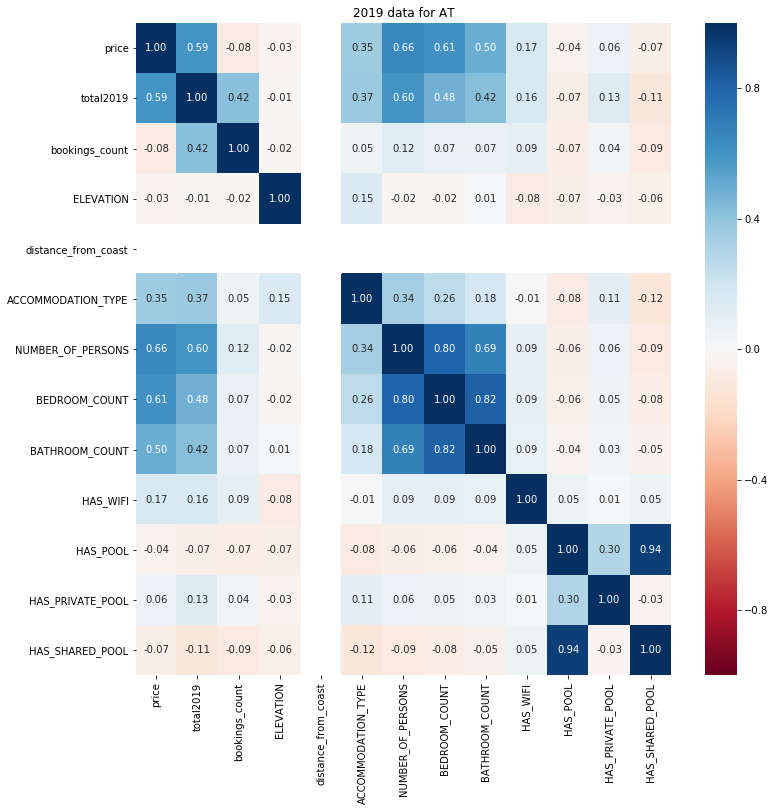

1727


<Figure size 1800x720 with 0 Axes>

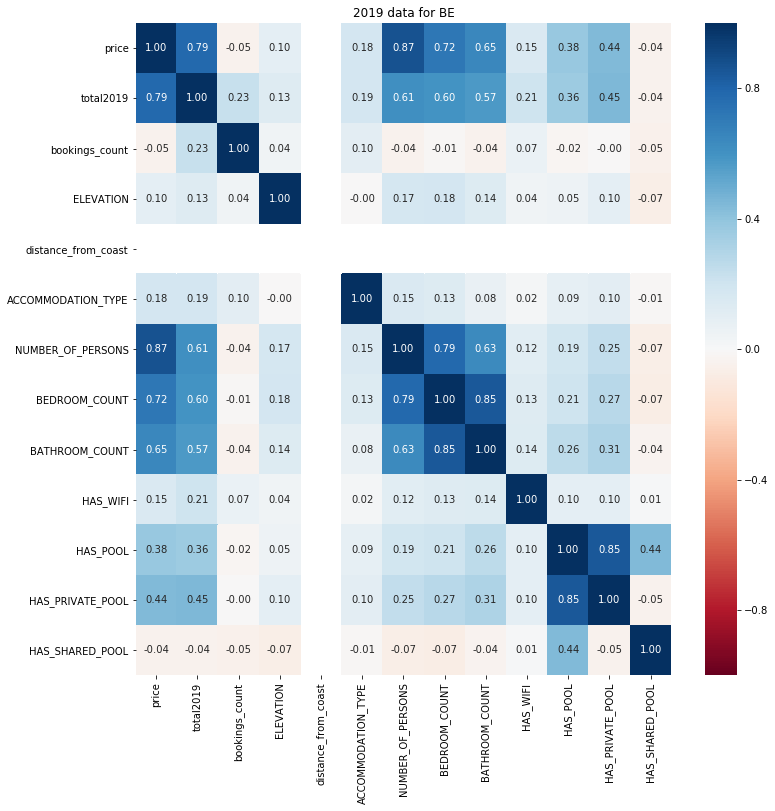

2874


<Figure size 1800x720 with 0 Axes>

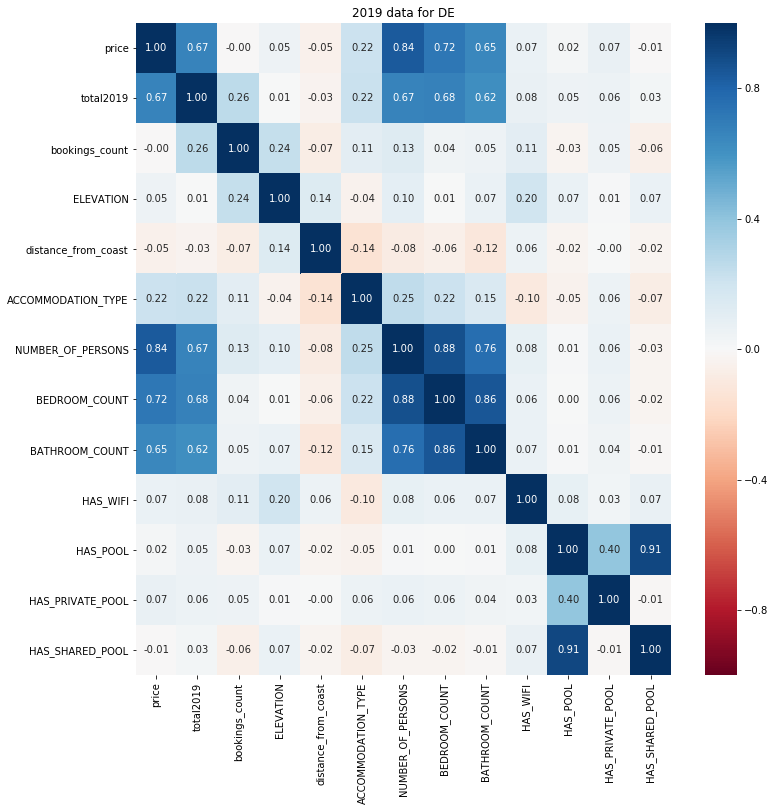

1825


<Figure size 1800x720 with 0 Axes>

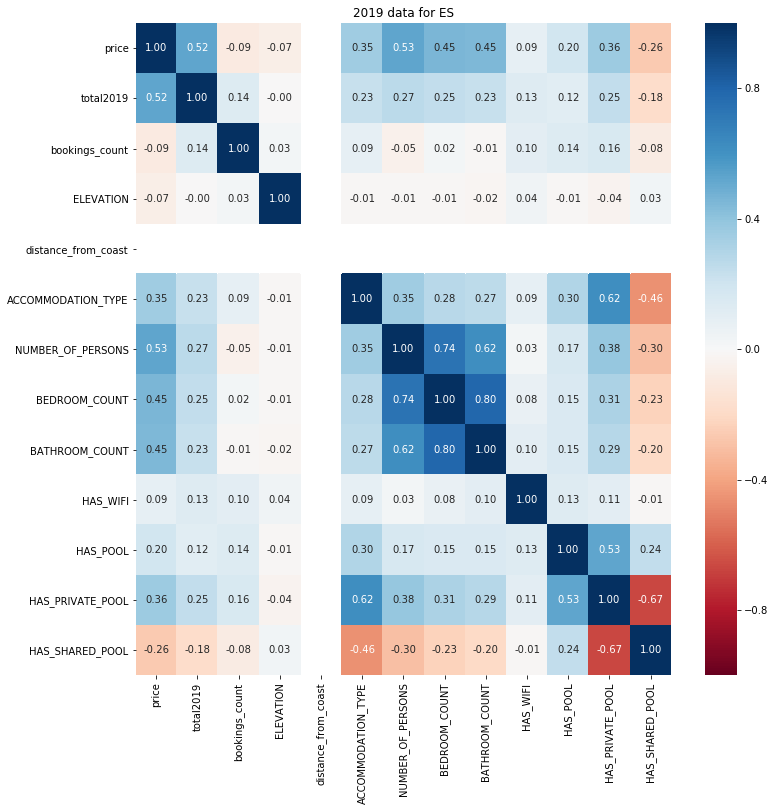

3433


<Figure size 1800x720 with 0 Axes>

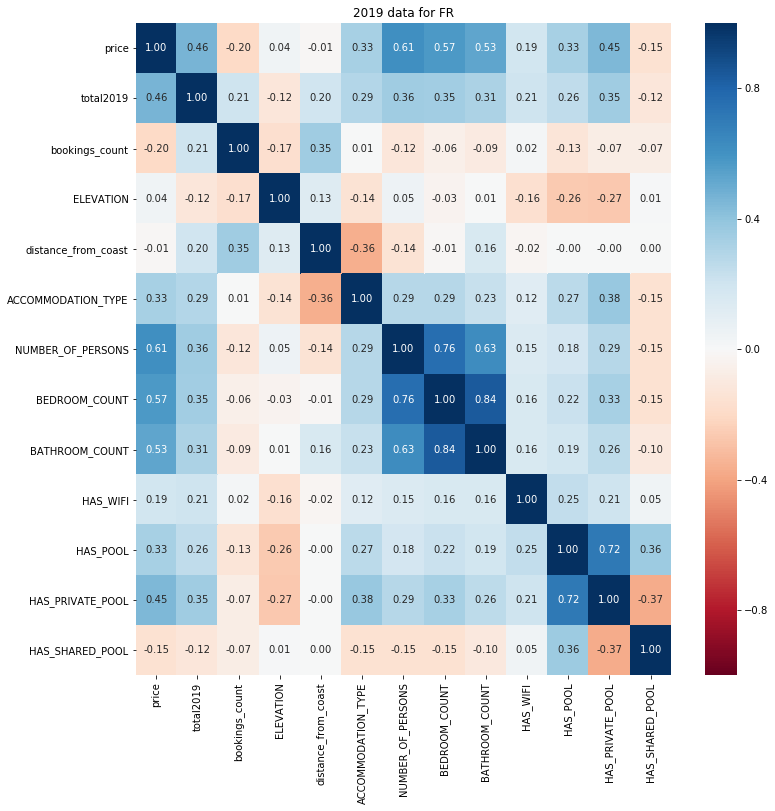

2367


<Figure size 1800x720 with 0 Axes>

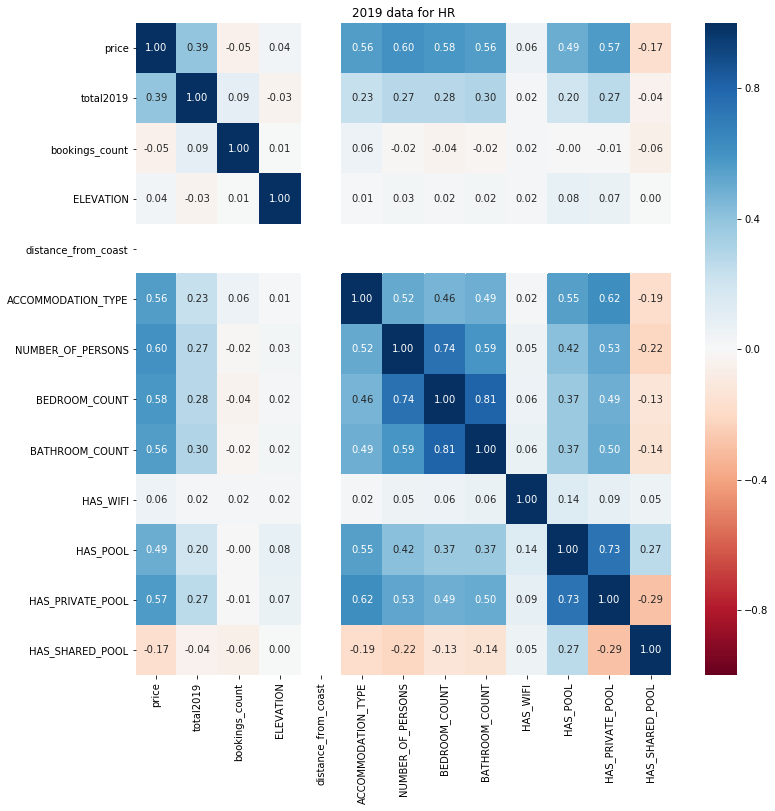

3832


<Figure size 1800x720 with 0 Axes>

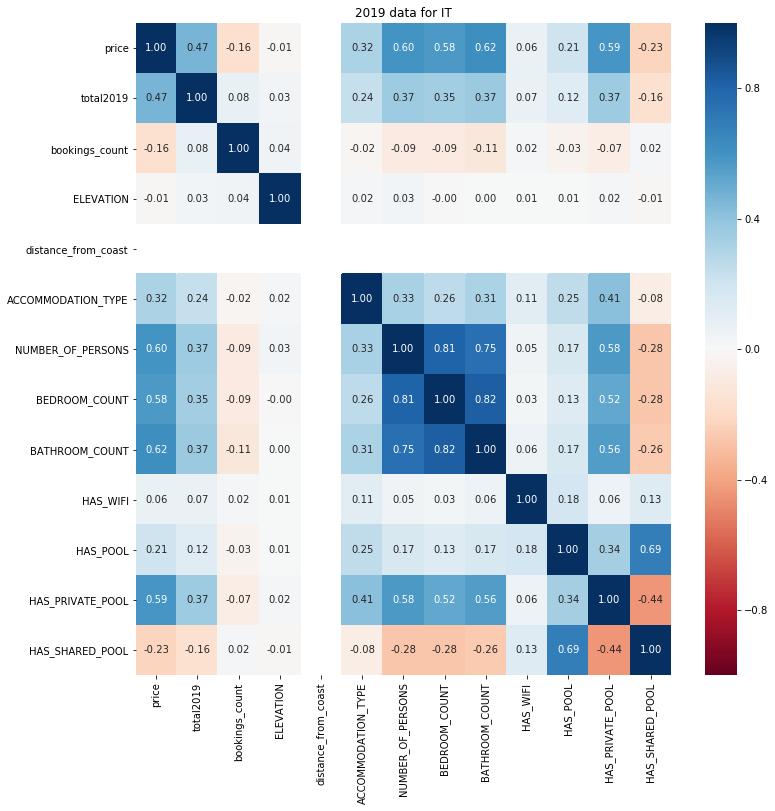

<Figure size 1800x720 with 0 Axes>

In [43]:
corr_cols = ['price','total2019','bookings_count','ELEVATION','distance_from_coast', 'ACCOMMODATION_TYPE','NUMBER_OF_PERSONS', 'BEDROOM_COUNT', 'BATHROOM_COUNT', 'HAS_WIFI', 'HAS_POOL', 'HAS_PRIVATE_POOL', 'HAS_SHARED_POOL']
for country in countries_list_to_analyse:
    country_df = property_df.query("COUNTRY == @country")
#     country_df = country_df[country_df["if_near_coast"] == 1]
    country_df = country_df[corr_cols]
    print(len(country_df.values))

#     country2017_df = country_df[country_df["total2017"]!=0]
#     country2018_df = country_df[country_df["total2018"]!=0]
#     country2019_df = country_df[country_df["total2019"]!=0]
    
    country_df = (country_df - country_df.mean())/country_df.std()
    plt.subplots(figsize=(12,12))
#     plt.subplot(2,2,1)
#     colormap = plt.cm.RdBu
# #     plt.figure(figsize=(15,15))
#     sns.heatmap(country2017_df[corr_cols].astype(float).corr(), linewidths=0.0, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor='black', annot=True,fmt=".2f")
#     plt.title('2017 data '+country)
    
#     plt.subplot(2,2,3)
#     colormap = plt.cm.RdBu
# #     plt.figure(figsize=(15,15))
#     sns.heatmap(country2018_df[corr_cols].astype(float).corr(), linewidths=0.0, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor='black', annot=True,fmt=".2f")
#     plt.title('2018 data '+country)
    
#     plt.subplot(2,2,2)
    colormap = plt.cm.RdBu
    sns.heatmap(country_df[corr_cols].astype(float).corr(), vmax=1.0, vmin=-1.0, cmap=colormap, linecolor='black', annot=True,fmt=".2f")
    plt.title('2019 data for '+country)

    
    plt.show()
    plt.tight_layout()

### __Model Building__

#### __Preparing data__

In [44]:
import lightgbm as lgb

In [67]:
# Clipping outliers
def clipping_outliers(X_train, df, var):
    IQR = X_train[var].quantile(0.85)-X_train[var].quantile(0.15)
    lower_bound = X_train[var].quantile(0.25) - 4*IQR
    upper_bound = X_train[var].quantile(0.75) + 4*IQR
    no_outliers = len(df[df[var]>upper_bound]) + len(df[df[var]<lower_bound])
    print('There are %i outliers in %s: %.3f%%' %(no_outliers, var, no_outliers/len(df)))
    df[var] = df[var].clip(lower_bound, upper_bound)
    return df

In [68]:
columns = ["ACCO_DESCRIPTION", "NUMBER_OF_PERSONS", "BEDROOM_COUNT", "BATHROOM_COUNT", "HAS_WIFI", "HAS_POOL","HAS_PRIVATE_POOL", "HAS_SHARED_POOL", "IS_SKIING","max" ,"ELEVATION", "if_near_coast", "distance_from_coast", "price", "bookings_count"]
country_df = property_df[(property_df['COUNTRY'] == "DE")]
data_train = country_df[columns]
zero_revenue_count = data_train[data_train["max"] == 0].count()
# data_train = property_df[columns]
print(zero_revenue_count)

ACCO_DESCRIPTION       0
NUMBER_OF_PERSONS      0
BEDROOM_COUNT          0
BATHROOM_COUNT         0
HAS_WIFI               0
HAS_POOL               0
HAS_PRIVATE_POOL       0
HAS_SHARED_POOL        0
IS_SKIING              0
max                    0
ELEVATION              0
if_near_coast          0
distance_from_coast    0
price                  0
bookings_count         0
dtype: int64


In [69]:
data_train['price'] = data_train['price'].fillna(0)
data_train["bookings_count"] = data_train["bookings_count"].fillna(0)
# data_train['max'] = data_train['max'].fillna(0)
data_train = pd.get_dummies(data_train, columns=["ACCO_DESCRIPTION"], prefix=["ACCO_DESCRIPTION"])

In [70]:
for col in ["price", "max"]:
    data_train = clipping_outliers(data_train, data_train, col)

There are 8 outliers in price: 0.003%
There are 14 outliers in max: 0.005%


In [71]:
data_train.tail(4)

NUMBER_OF_PERSONS  BEDROOM_COUNT  BATHROOM_COUNT  HAS_WIFI  HAS_POOL  \
7634                  3              1               1         1         0   
7635                  6              4               1         1         0   
7636                  2              1               1         1         0   
7637                  6              3               1         1         0   

      HAS_PRIVATE_POOL  HAS_SHARED_POOL  IS_SKIING          max  ELEVATION  \
7634                 0                0          0  12026.83757      469.0   
7635                 0                0          0  20603.69400      499.0   
7636                 0                0          0  15173.79630      499.0   
7637                 0                0          0   9284.20900      184.0   

      if_near_coast  distance_from_coast      price  bookings_count  \
7634              0                  NaN  56.113082            60.0   
7635              0                  NaN  77.634731            54.0   
7636              0                  NaN  56.745263            37.0   
7637              0                  NaN   0.000000             0.0   

      ACCO_DESCRIPTION_Apartment  ACCO_DESCRIPTION_Bungalow  \
7634                           0                          0   
7635                           0                          0   
7636                           0                          0   
7637                           1                          0   

      ACCO_DESCRIPTION_Castle  ACCO_DESCRIPTION_Chalet  \
7634                        0                        0   
7635                        0                        0   
7636                        0                        0   
7637                        0                        0   

      ACCO_DESCRIPTION_Cottage  ACCO_DESCRIPTION_Farmhouse  \
7634                         0                           0   
7635                         0                           0   
7636                         0                           0   
7637                         0                           0   

      ACCO_DESCRIPTION_Holiday home  ACCO_DESCRIPTION_Mansion  \
7634                              1                         0   
7635                              1                         0   
7636                              1                         0   
7637                              0                         0   

      ACCO_DESCRIPTION_Mill  ACCO_DESCRIPTION_Villa  
7634                      0                       0  
7635                      0                       0  
7636                      0                       0  
7637                      0                       0

In [72]:
# data_train = (data_train - data_train.mean())/data_train.std()

In [73]:
len(data_train.values)

2874

In [74]:
unused_cols = ['ACCOMMODATION_CODE', 'ACCOMMODATION_TYPE', 'HAS_INDOOR_POOL',
               'HAS_OUTDOOR_POOL', 'IS_DETACHED', 'HAS_SAUNA', 'HAS_JACUZZI', 
               'IS_ON_A_FARM', 'X2017.x', 'X2018.x', 'X2019.x', 'X2017.y',
               'X2018.y', 'X2019.y','max','total2018', 'total2017', 
               'Total_HO','Total_BV', 'LATITUDE', 'LONGITUDE', 'max',
               'nearest_coastal_longitude','nearest_coastal_latitude', 'COUNTRY', 'bookings_count']
features = [col for col in data_train.columns if col not in unused_cols]
print(features)
train = data_train[features][:-300]
test = data_train[features][-300:]
train.to_csv("train.csv")

['NUMBER_OF_PERSONS', 'BEDROOM_COUNT', 'BATHROOM_COUNT', 'HAS_WIFI', 'HAS_POOL', 'HAS_PRIVATE_POOL', 'HAS_SHARED_POOL', 'IS_SKIING', 'ELEVATION', 'if_near_coast', 'distance_from_coast', 'price', 'ACCO_DESCRIPTION_Apartment', 'ACCO_DESCRIPTION_Bungalow', 'ACCO_DESCRIPTION_Castle', 'ACCO_DESCRIPTION_Chalet', 'ACCO_DESCRIPTION_Cottage', 'ACCO_DESCRIPTION_Farmhouse', 'ACCO_DESCRIPTION_Holiday home', 'ACCO_DESCRIPTION_Mansion', 'ACCO_DESCRIPTION_Mill', 'ACCO_DESCRIPTION_Villa']


In [75]:
target_revenue = data_train['max'][:-300]
target_price = data_train['bookings_count'][:-300]

In [76]:
target_price.head()

4764    20.0
4765     0.0
4766    54.0
4767    17.0
4768    54.0
Name: bookings_count, dtype: float64

In [77]:
test.head()

NUMBER_OF_PERSONS  BEDROOM_COUNT  BATHROOM_COUNT  HAS_WIFI  HAS_POOL  \
7338                  2              1               1         1         0   
7339                  6              3               1         0         0   
7340                  4              4               1         1         0   
7341                  4              2               1         1         0   
7342                  4              2               1         1         1   

      HAS_PRIVATE_POOL  HAS_SHARED_POOL  IS_SKIING  ELEVATION  if_near_coast  \
7338                 0                0          0      801.0              0   
7339                 0                0          0      703.0              0   
7340                 0                0          0      621.0              0   
7341                 0                0          0      627.0              0   
7342                 0                1          0      437.0              0   

      distance_from_coast       price  ACCO_DESCRIPTION_Apartment  \
7338                  NaN   46.067654                           1   
7339                  NaN   84.622666                           1   
7340                  NaN   70.413145                           1   
7341                  NaN   73.073143                           1   
7342                  NaN  110.863324                           1   

      ACCO_DESCRIPTION_Bungalow  ACCO_DESCRIPTION_Castle  \
7338                          0                        0   
7339                          0                        0   
7340                          0                        0   
7341                          0                        0   
7342                          0                        0   

      ACCO_DESCRIPTION_Chalet  ACCO_DESCRIPTION_Cottage  \
7338                        0                         0   
7339                        0                         0   
7340                        0                         0   
7341                        0                         0   
7342                        0                         0   

      ACCO_DESCRIPTION_Farmhouse  ACCO_DESCRIPTION_Holiday home  \
7338                           0                              0   
7339                           0                              0   
7340                           0                              0   
7341                           0                              0   
7342                           0                              0   

      ACCO_DESCRIPTION_Mansion  ACCO_DESCRIPTION_Mill  ACCO_DESCRIPTION_Villa  
7338                         0                      0                       0  
7339                         0                      0                       0  
7340                         0                      0                       0  
7341                         0                      0                       0  
7342                         0                      0                       0

### __Modelling__

##### __Hyperparameter tuning__

#### __Fitting__

In [83]:
iterations = 25000
n_folds = 5

In [84]:
model_revenue = lgb.LGBMRegressor(num_leaves=50,
                        max_depth=10,
                        learning_rate=0.005,
                        n_estimators=iterations,
                        min_child_samples=25,
                        subsample=0.75,
                        subsample_freq=1,
                        feature_fraction=0.75,
                        random_state=2019,
                        n_jobs=4,
                        metrics='mae',
                        lambda_l1= 0,
                        lambda_l2 = 0.2)

In [85]:
model_price = lgb.LGBMRegressor(num_leaves=50,
                        max_depth=10,
                        learning_rate=0.005,
                        n_estimators=iterations,
                        min_child_samples=25,
                        subsample=0.75,
                        subsample_freq=1,
                        feature_fraction=0.75,
                        lambda_l2=0.2,
                        random_state=2019,
                        n_jobs=4,
                        metrics='mae')

In [86]:
oof_train = np.zeros(shape=(len(train)))

### __Training__

#### __Revenue__

In [87]:
print("Training for revenue")
feature_importance_df_revenue = pd.DataFrame()
folds = KFold(n_splits=n_folds, shuffle=True, random_state=2019)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target_revenue.values)):
    print('Fold no %i/%i'%(fold_+1,n_folds))
    trn_data = train.iloc[trn_idx][features]
    trn_label = target_revenue.iloc[trn_idx]
    val_data = train.iloc[val_idx][features]
    val_label = target_revenue.iloc[val_idx]
    model_revenue.fit(X=trn_data, y=trn_label,
                     eval_set=[(trn_data, trn_label), (val_data, val_label)],
                     verbose=500,early_stopping_rounds=500)

    oof_train[val_idx] = model_revenue.predict(val_data)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = model_revenue.feature_importances_
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df_revenue = pd.concat([feature_importance_df_revenue, fold_importance_df], axis=0)

score = mean_absolute_error(oof_train[:], target_revenue)
print('Training CV score: %.5f' %score)

Training for revenue
Fold no 1/5
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 5027.18	valid_1's l1: 5078.48
[1000]	training's l1: 4633.35	valid_1's l1: 4976.4
[1500]	training's l1: 4402.32	valid_1's l1: 4977.81
Early stopping, best iteration is:
[1183]	training's l1: 4540.88	valid_1's l1: 4972.62
Fold no 2/5
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 4705.56	valid_1's l1: 6410
[1000]	training's l1: 4302	valid_1's l1: 6412.87
Early stopping, best iteration is:
[557]	training's l1: 4634.94	valid_1's l1: 6403.22
Fold no 3/5
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 4903.69	valid_1's l1: 5616.4
[1000]	training's l1: 4485.56	valid_1's l1: 5514.36
[1500]	training's l1: 4256.29	valid_1's l1: 5486.23
[2000]	training's l1: 4075.88	valid_1's l1: 5471.56
[2500]	training's l1: 3916.46	valid_1's l1: 5457.07
[3000]	training's l1: 3771	valid_1's l1: 5458.99
Early stopping, best itera

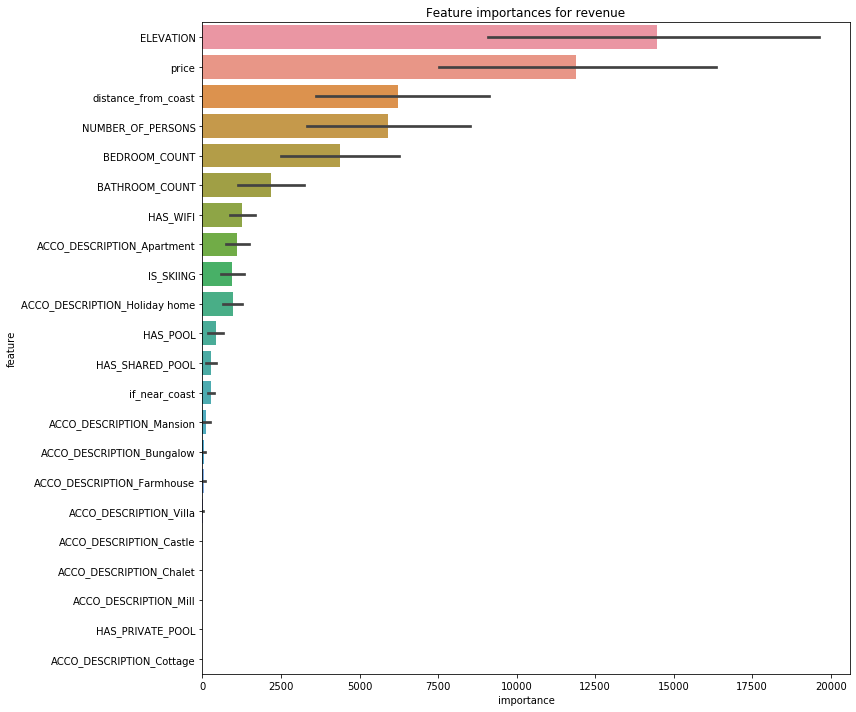

In [88]:
# Visualisation
cols = (feature_importance_df_revenue[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:25].index)

best_features = feature_importance_df_revenue.loc[feature_importance_df_revenue.feature.isin(cols)]

plt.figure(figsize=(12,10))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('Feature importances for revenue')
plt.tight_layout()

### __Price__

In [103]:
print("Training for price")
feature_importance_df_price = pd.DataFrame()
folds = KFold(n_splits=n_folds, shuffle=True, random_state=2019)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target_price.values)):
    print('Fold no %i/%i'%(fold_+1,n_folds))
    trn_data = train.iloc[trn_idx][features]
    trn_label = target_price.iloc[trn_idx]
    val_data = train.iloc[val_idx][features]
    val_label = target_price.iloc[val_idx]
    model_price.fit(X=trn_data, y=trn_label,
                     eval_set=[(trn_data, trn_label), (val_data, val_label)],
                     verbose=500,
                     early_stopping_rounds=500)

    oof_train[val_idx] = model_price.predict(val_data)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = model_price.feature_importances_
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df_price = pd.concat([feature_importance_df_price, fold_importance_df], axis=0)

score = mean_absolute_error(oof_train[:], target_price)
print('Training CV score: %.5f' %score)

Training for price
Fold no 1/5
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 0.477691	valid_1's l1: 0.532062
[1000]	training's l1: 0.42211	valid_1's l1: 0.5126
[1500]	training's l1: 0.397774	valid_1's l1: 0.51475
Early stopping, best iteration is:
[1023]	training's l1: 0.420795	valid_1's l1: 0.512342
Fold no 2/5
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 0.478755	valid_1's l1: 0.529215
[1000]	training's l1: 0.421767	valid_1's l1: 0.512479
Early stopping, best iteration is:
[852]	training's l1: 0.431256	valid_1's l1: 0.51223
Fold no 3/5
Training until validation scores don't improve for 500 rounds
[500]	training's l1: 0.479462	valid_1's l1: 0.525711
[1000]	training's l1: 0.422394	valid_1's l1: 0.511549
[1500]	training's l1: 0.397498	valid_1's l1: 0.514197
Early stopping, best iteration is:
[1072]	training's l1: 0.418794	valid_1's l1: 0.511213
Fold no 4/5
Training until validation scores don't improve for 500 ro

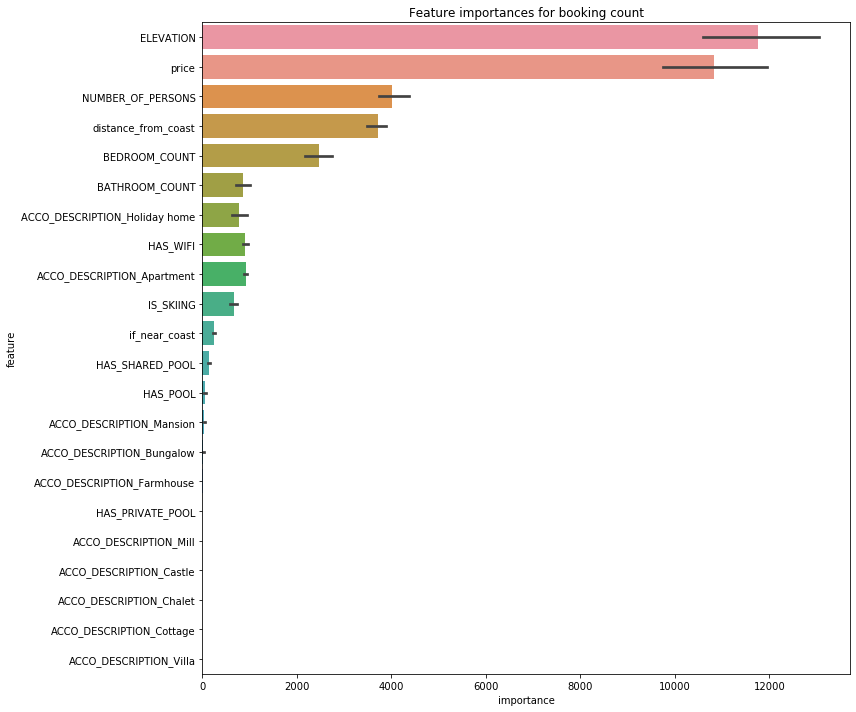

In [104]:
# Visualisation
cols = (feature_importance_df_price[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:25].index)

best_features = feature_importance_df_price.loc[feature_importance_df_price.feature.isin(cols)]

plt.figure(figsize=(12,10))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('Feature importances for booking count')
plt.tight_layout()